# Telco Customer Churn
## Data Science Case Studies in Customer Insights by Python

### Context of this project:

**Predict behaviour to retain customers by analysing all relevant customer data and developing focused customer retention programmes.**

A PowerBI report link corresponding to this notebook is as follows: https://app.powerbi.com/view?r=eyJrIjoiY2M0MTBjOWItOTFhZC00OGM1LWFlZDMtYTIxMWQ1YjM2ZDkwIiwidCI6ImNkNWRmNDkxLTZhMTYtNDkzZS1iNTVhLTkzOGYzYWE5YWRlYiIsImMiOjEwfQ%3D%3D

### PART 1: Understand the data & Data Cleaning

**1.  Import the Original Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv("D:\Telco Customer Churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

**2.  Understand the Data**

In [7]:
df.shape

(7043, 21)

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The ```TotalCharges``` column should be a numeric type, but it's currently an object type. Try to convert ```TotalCharges``` to a numeric type and check for any non-numeric values.

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
df[df['TotalCharges'].isnull()]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

After taking a look at these rows with missing ```TotalCharges```,  they all have a ```tenure``` of 0, indicating that these customers have not been with the company for a full month yet, and that's why they have not yet been charged. Therefore, replcace these missing values with 0.

In [5]:
df['TotalCharges'].fillna(0, inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The following steps can help us distinguish whether features are categorical or numerical to differentiate whether the attributes of features are qualitative or quantitative, discrete or continuous:

In [8]:
for feature in df.columns:
    print("{} has {} unique items".format(feature, df[feature].nunique()))

customerID has 7043 unique items
gender has 2 unique items
SeniorCitizen has 2 unique items
Partner has 2 unique items
Dependents has 2 unique items
tenure has 73 unique items
PhoneService has 2 unique items
MultipleLines has 3 unique items
InternetService has 3 unique items
OnlineSecurity has 3 unique items
OnlineBackup has 3 unique items
DeviceProtection has 3 unique items
TechSupport has 3 unique items
StreamingTV has 3 unique items
StreamingMovies has 3 unique items
Contract has 3 unique items
PaperlessBilling has 2 unique items
PaymentMethod has 4 unique items
MonthlyCharges has 1585 unique items
TotalCharges has 6531 unique items
Churn has 2 unique items


In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
Category_feature = [feature for feature in df.columns if df[feature].nunique() < 5]
Category_feature

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

### PART 2: Exploratory Data Analysis & Data Visualisation

**1.  Analyse the value distribution of numerical features**

In [9]:
df[['tenure','MonthlyCharges','TotalCharges']].describe()

tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000

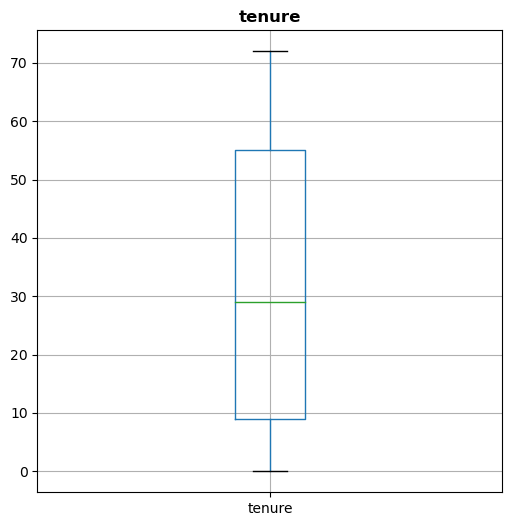

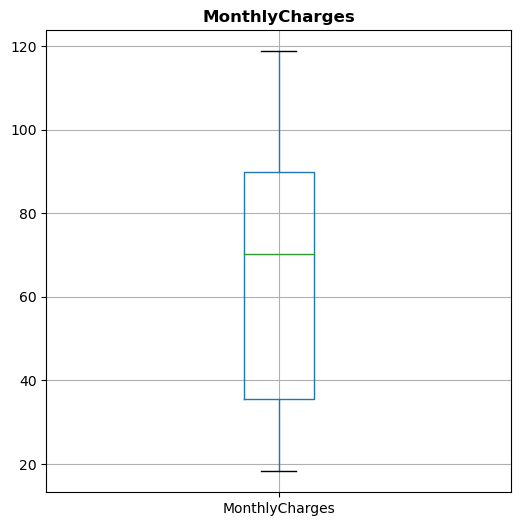

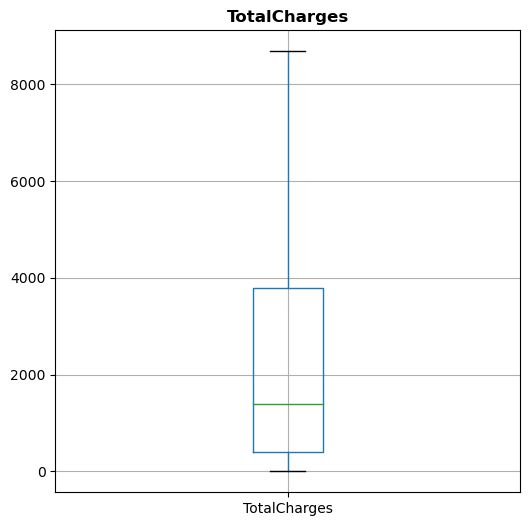

In [19]:
for col in df[['tenure','MonthlyCharges','TotalCharges']]:
    df.boxplot(column=col, figsize=(6,6))
    plt.title(col, fontweight='bold')
    plt.show()

<Axes: xlabel='TotalCharges', ylabel='Density'>

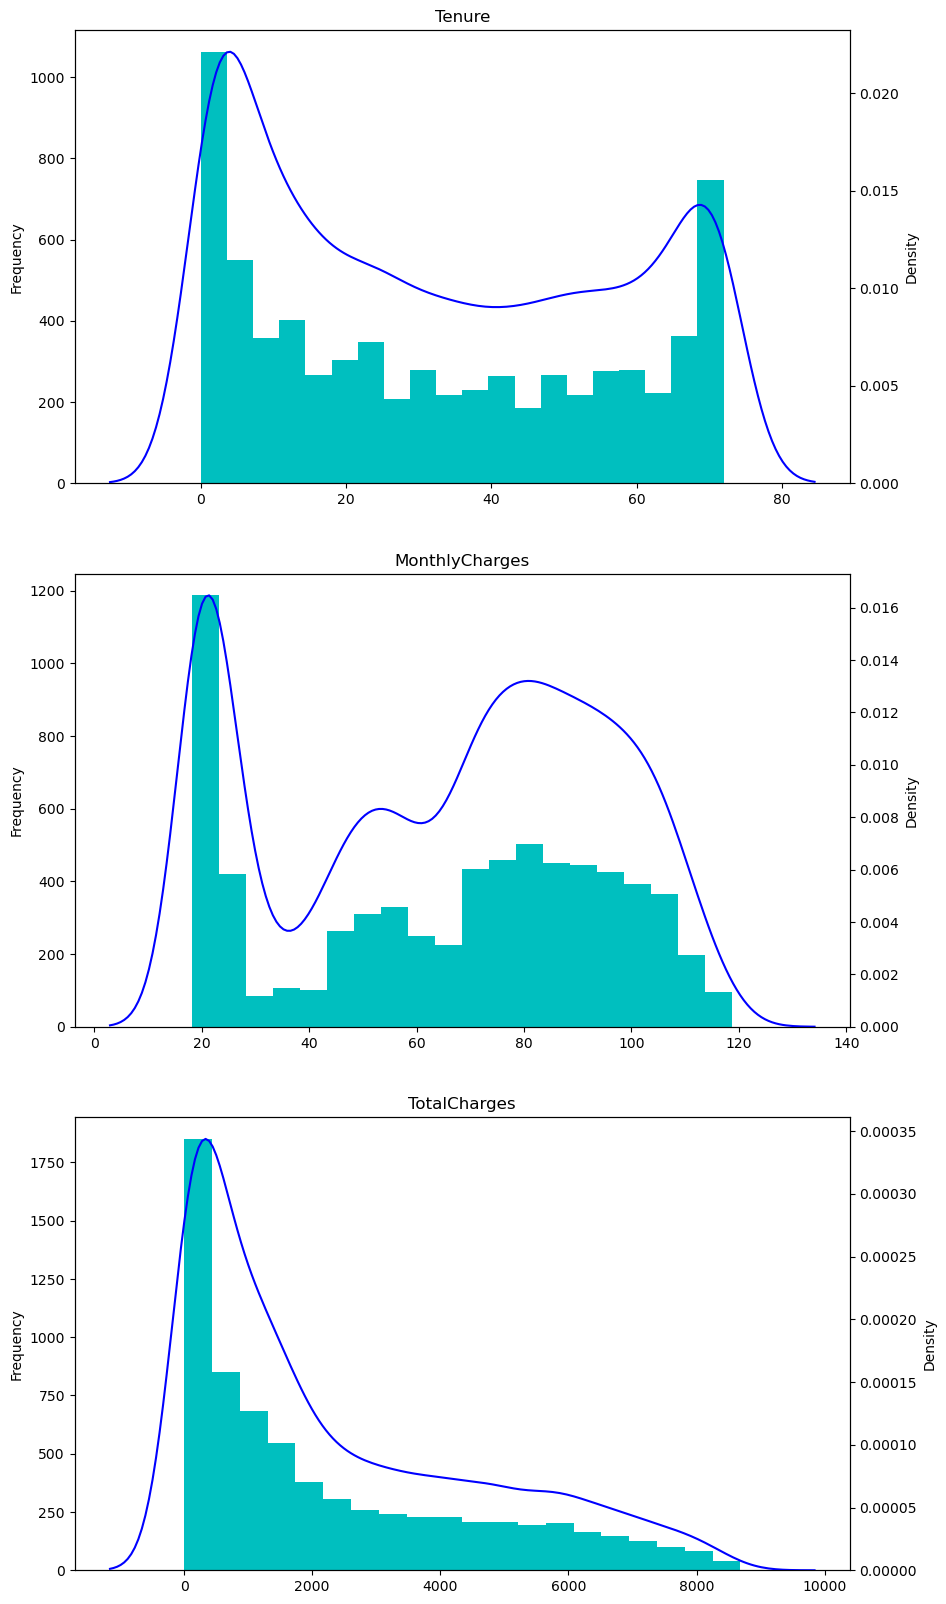

In [23]:
%matplotlib inline

fig, axs = plt.subplots(nrows=3, figsize=(10, 20))

df['tenure'].plot(kind='hist', bins=20, ax=axs[0], stacked=True, color='c', title='Tenure')
ax2 = axs[0].twinx()
sns.kdeplot(df['tenure'], ax=ax2, color='b')

df['MonthlyCharges'].plot(kind='hist', bins=20, ax=axs[1], stacked=True, color='c', title='MonthlyCharges')
ax2 = axs[1].twinx()
sns.kdeplot(df['MonthlyCharges'], ax=ax2, color='b')

df['TotalCharges'].plot(kind='hist', bins=20, ax=axs[2], stacked=True, color='c', title='TotalCharges')
ax2 = axs[2].twinx()
sns.kdeplot(df['TotalCharges'], ax=ax2, color='b')

**2.  Analyse the value distribution of categorical features**

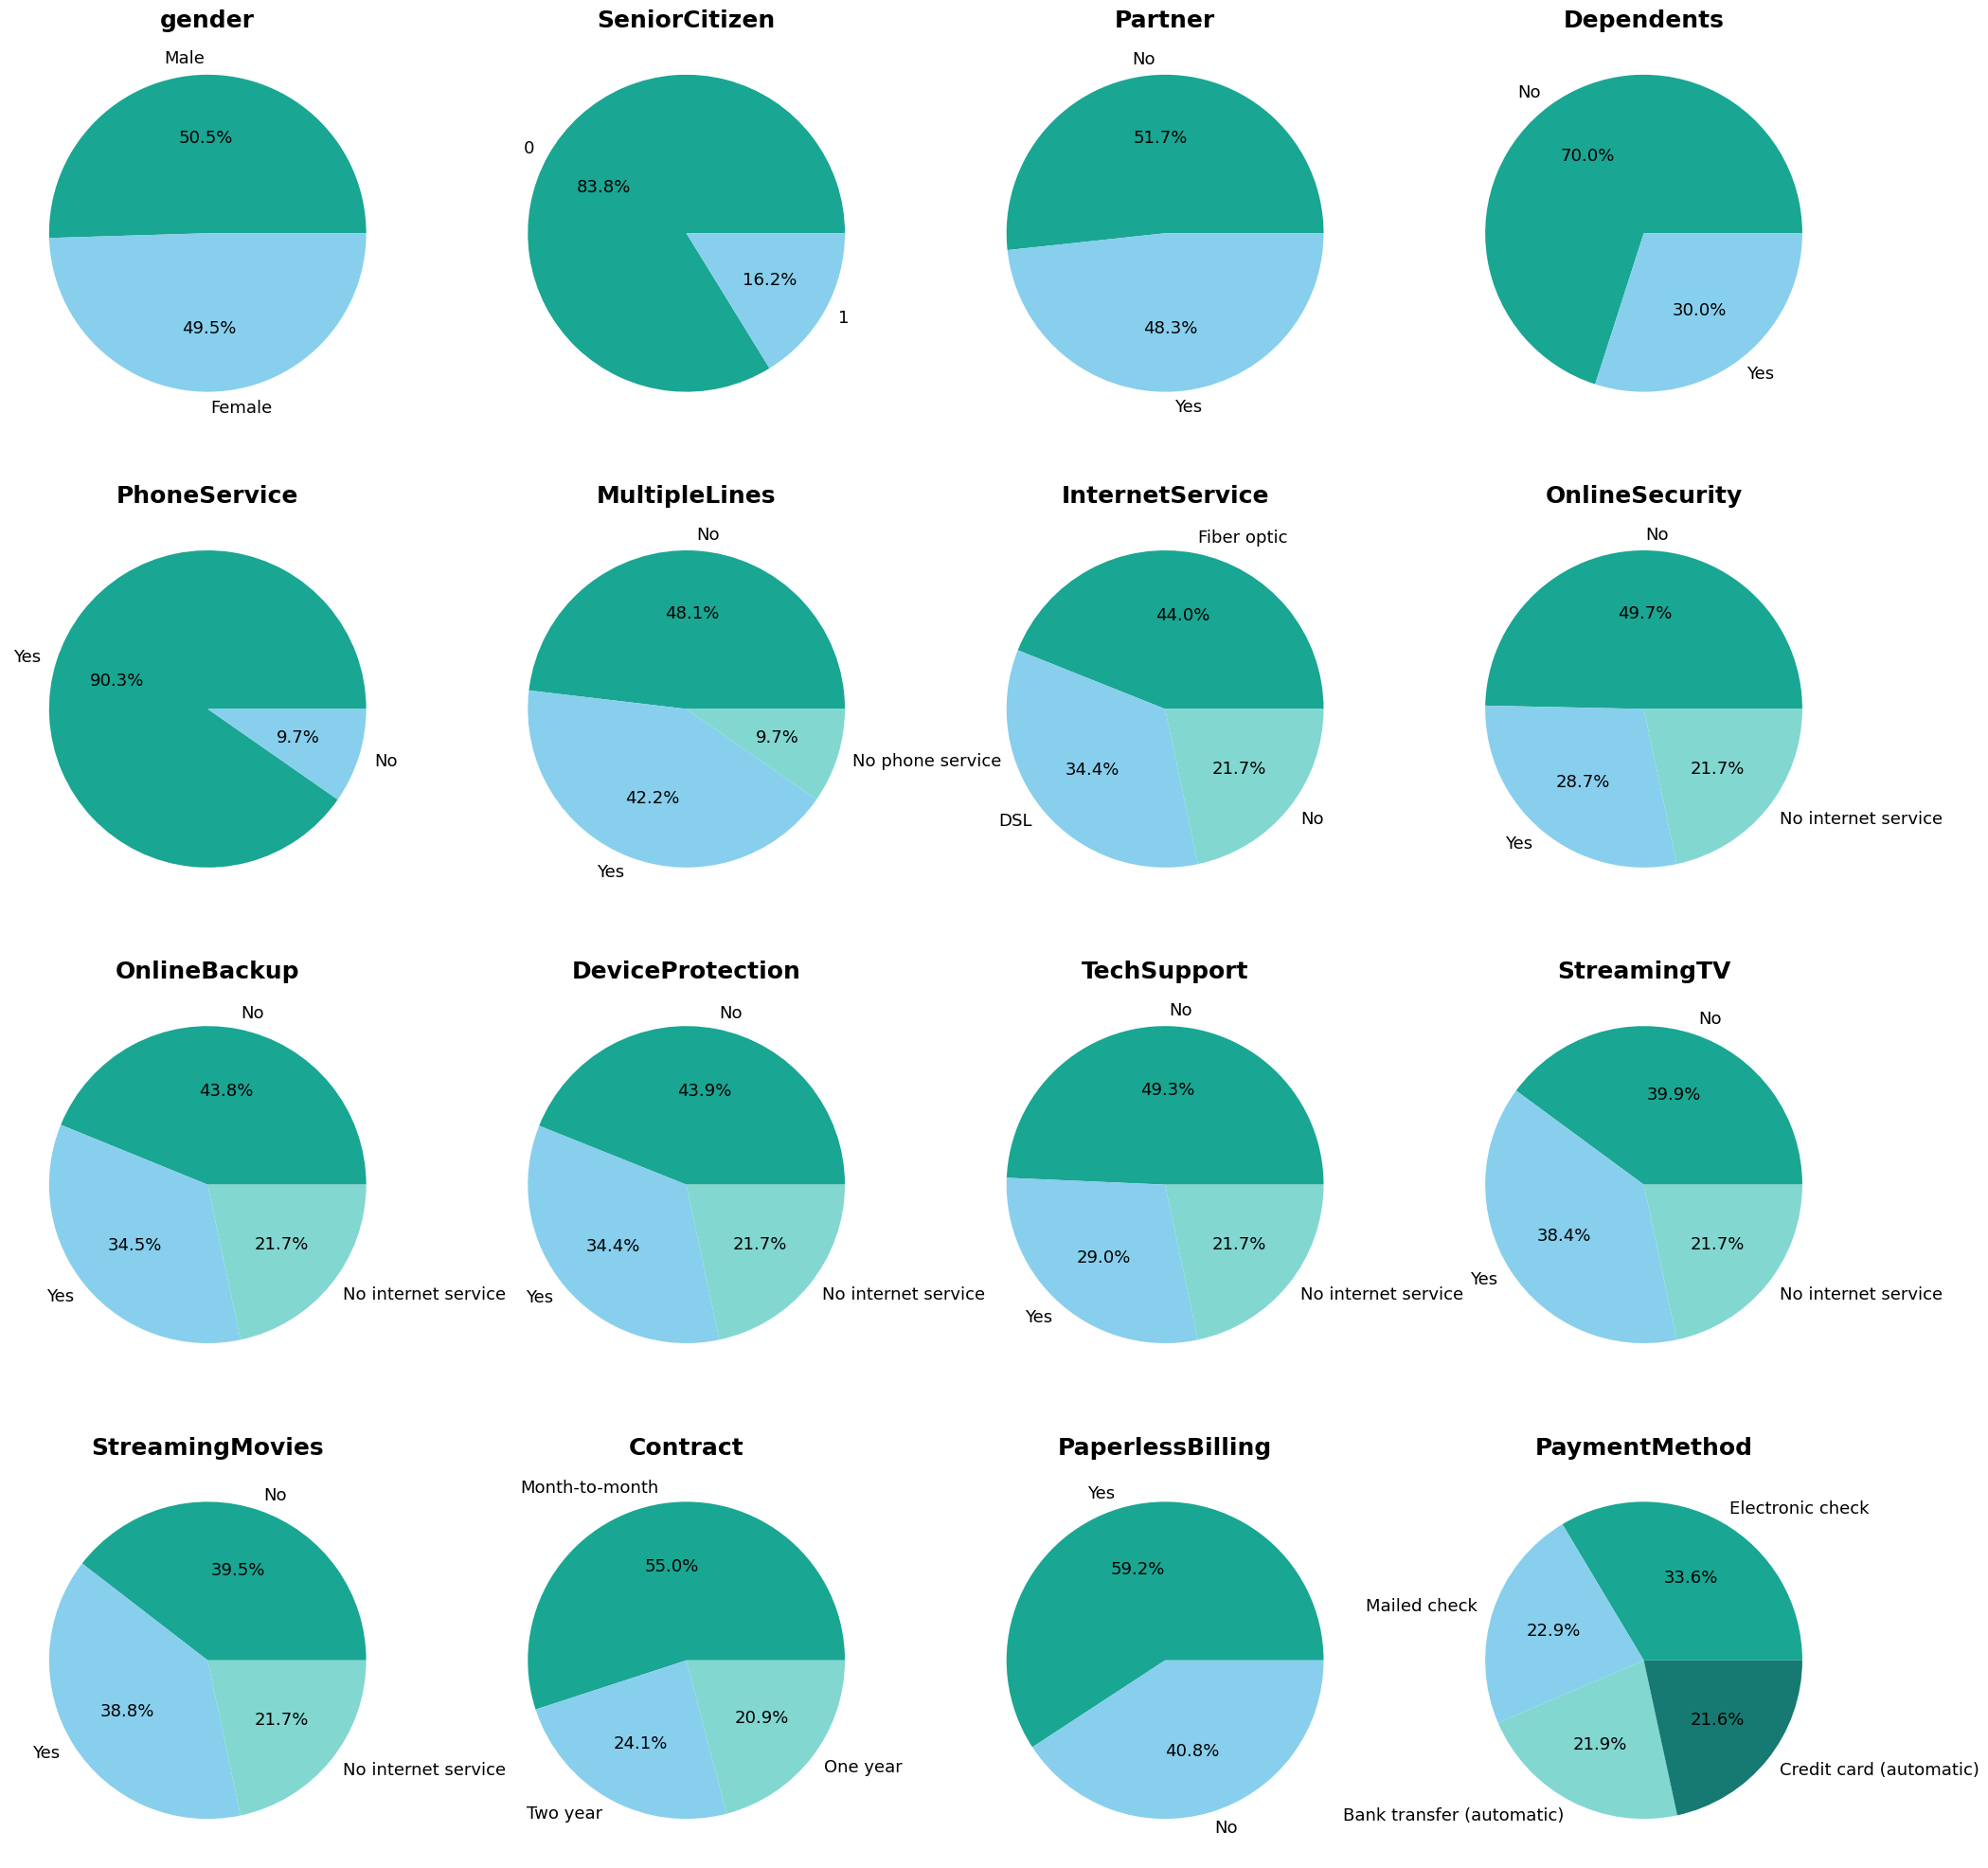

In [28]:
fig, axs = plt.subplots(4,4,figsize=(25, 25))

for i in range(4):
    for j in range(4):
        axs[i, j].pie(df[Category_feature[i*4+j]].value_counts().values, labels=df[Category_feature[i*4+j]].value_counts().index, 
                      autopct='%1.1f%%', colors=['#19A693','#87CFED','#82D7D1', '#167A73'], textprops={'fontsize': 13})
        axs[i, j].set_title(Category_feature[i*4+j],fontsize=18, fontweight='bold')
plt.show()

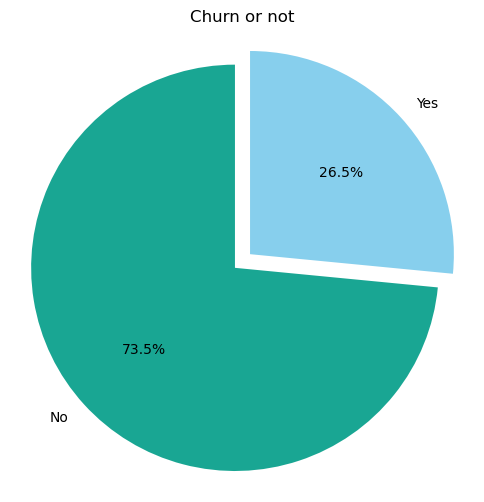

In [19]:
churn_counts = df['Churn'].value_counts()
labels = churn_counts.index
values = churn_counts.values

colors = ['#19A693', '#87CFED']
explode = (0, 0.1)

plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', startangle=90)

plt.title('Churn or not')
plt.axis('equal')

plt.show()

**3.  Analyse the correlation between features and churn**

**(1) Numerical features**

In [7]:
df_num = df[['tenure','MonthlyCharges','TotalCharges', 'Churn']]
df_num['Churn'] = df_num['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df_num.head()

tenure  MonthlyCharges  TotalCharges  Churn
0       1           29.85         29.85      0
1      34           56.95       1889.50      0
2       2           53.85        108.15      1
3      45           42.30       1840.75      0
4       2           70.70        151.65      1

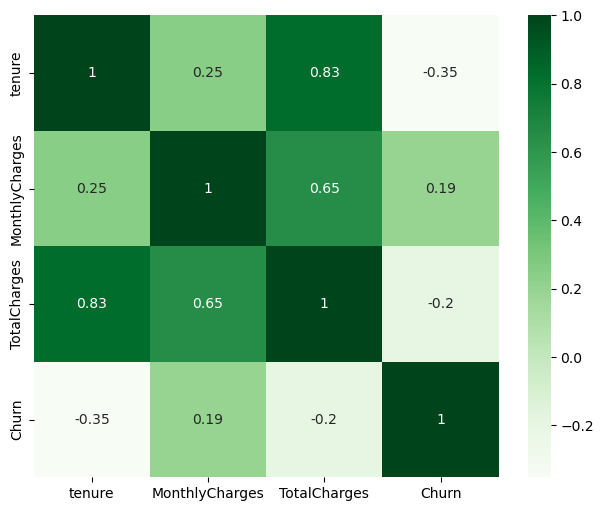

In [33]:
corr = df_num.corr()

plt.figure(figsize=(7.5,6))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='Greens', annot = True, annot_kws={'size':10})

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [34]:
def plot_distribution(dataframe, column, ax, bins_=20):

    temp = pd.DataFrame({"Retention": dataframe[dataframe["Churn"]==0][column],
    "Churn":dataframe[dataframe["Churn"]==1][column]})

    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True, color=['#19A693','#87CFED'])

    ax.set_xlabel(column)
    ax.set_title(column, fontsize=15, fontweight='bold')

    ax.ticklabel_format(style='plain', axis='x')
    
def plot_stacked_bars(dataframe, title_, size_=(10, 6), rot_=0, legend_="upper right"):

    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_,
        color=['#19A693','#87CFED']
    )

    annotate_stacked_bars(ax, textsize=14)
    ax.set_title(title_, fontsize=15, fontweight='bold')

    plt.legend(["Retention", "Churn"], loc=legend_)

    plt.ylabel("Customer (%)")
    plt.show()
    
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):

    for p in ax.patches:
        
        value = str(round(p.get_height(),1))
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

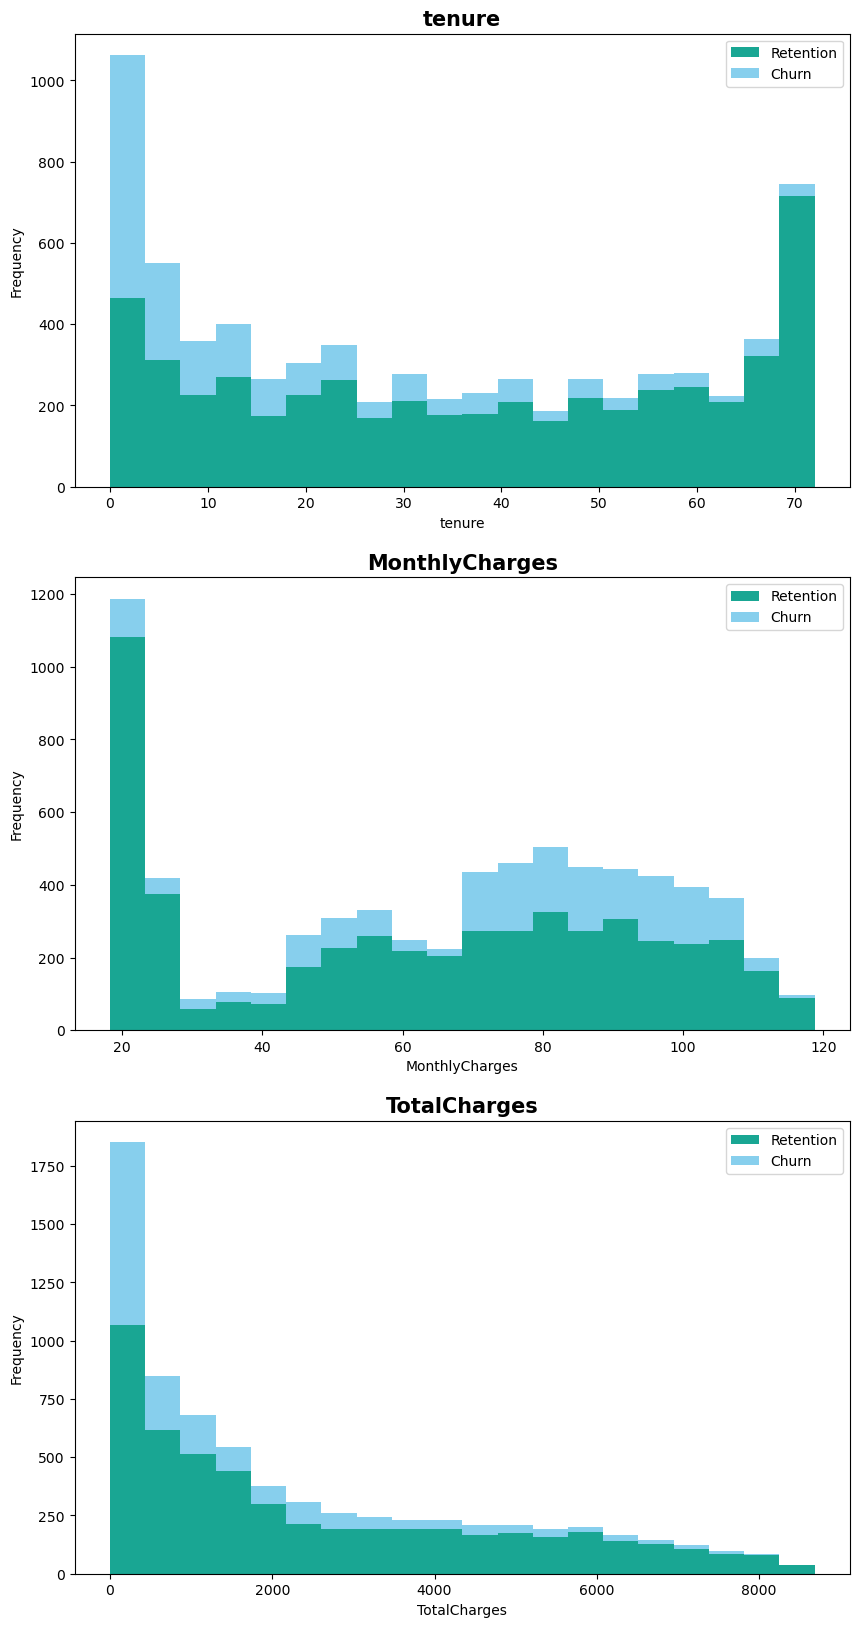

In [35]:
fig, axs = plt.subplots(nrows=3, figsize=(10, 20))

plot_distribution(df_num, 'tenure', axs[0])
plot_distribution(df_num, 'MonthlyCharges', axs[1])
plot_distribution(df_num, 'TotalCharges', axs[2])

```tenure``` and ```TotalCharges``` have a high correlation, which there are an exceptional high churn rate from low ```tenure``` and low amounts of ```TotalCharges```.

**(2) Categorical features**

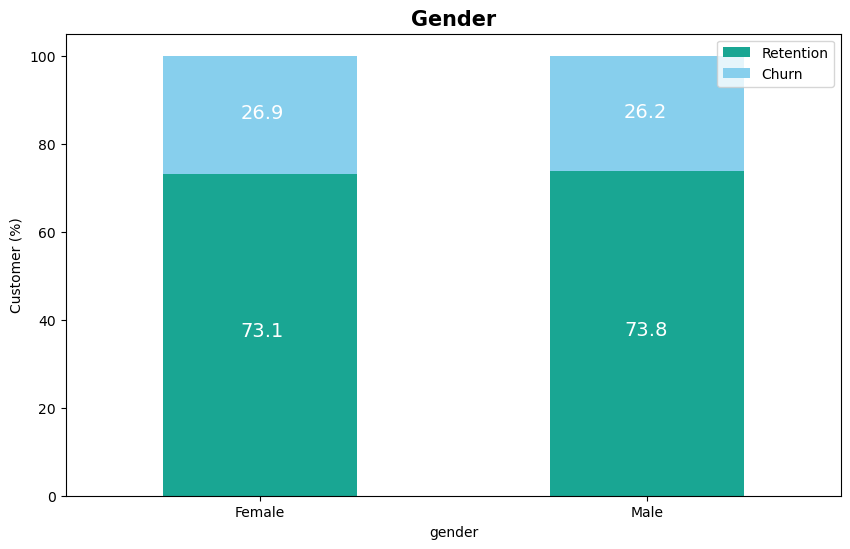

In [36]:
gender = df[['customerID', 'gender', 'Churn']]
gender = gender.groupby([gender['gender'], gender['Churn']])['customerID'].count().unstack(level=1).fillna(0)
gender_churn = (gender.div(gender.sum(axis=1), axis=0) * 100).sort_values(by='Yes', ascending=False)

plot_stacked_bars(gender_churn, 'Gender', rot_=0)

As the average churn rate is 26.5%, the chart shows that there isn't a significant impact from ```gender``` on churn rate.

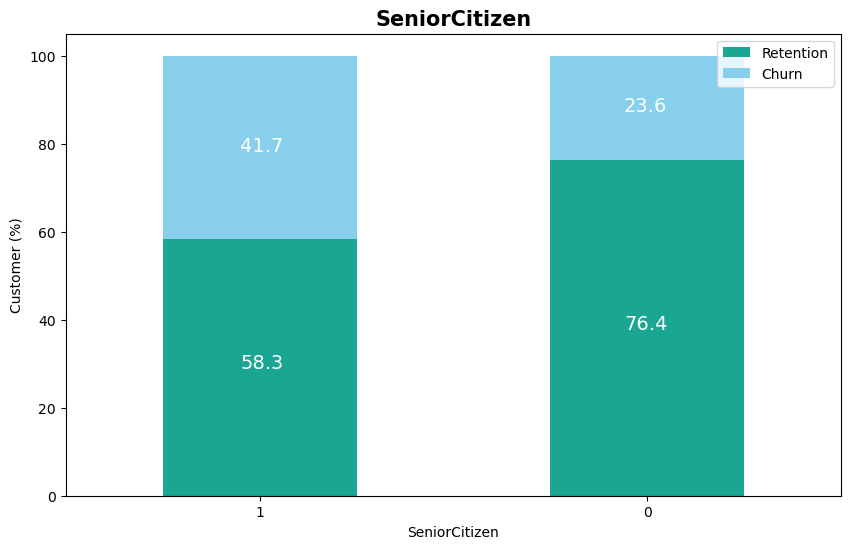

In [37]:
senior = df[['customerID', 'SeniorCitizen', 'Churn']]
senior = senior.groupby([senior['SeniorCitizen'], senior['Churn']])['customerID'].count().unstack(level=1).fillna(0)
senior_churn = (senior.div(senior.sum(axis=1), axis=0) * 100).sort_values(by='Yes', ascending=False)

plot_stacked_bars(senior_churn, 'SeniorCitizen', rot_=0)

As the average churn rate is 26.5%, the chart shows that there is a significant impact from ```SeniorCitizen``` on churn rate.

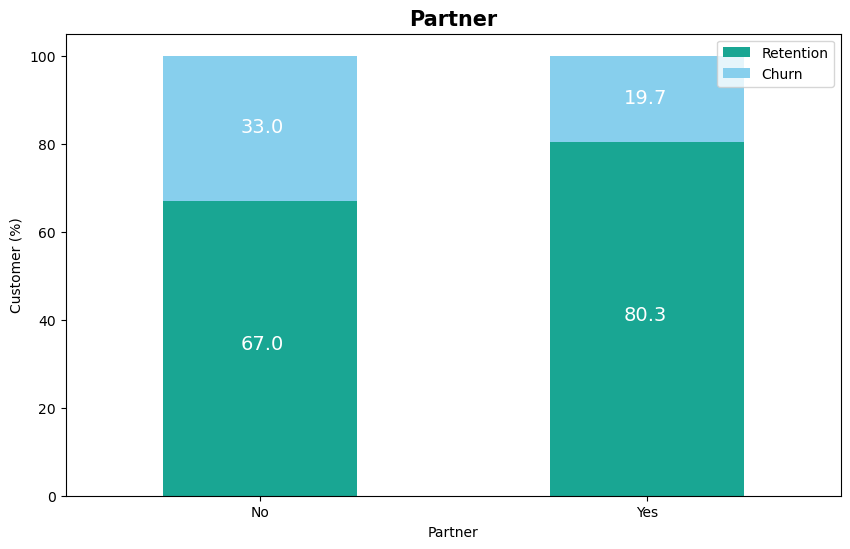

In [38]:
partner = df[['customerID', 'Partner', 'Churn']]
partner = partner.groupby([partner['Partner'], partner['Churn']])['customerID'].count().unstack(level=1).fillna(0)
partner_churn = (partner.div(partner.sum(axis=1), axis=0) * 100).sort_values(by='Yes', ascending=False)

plot_stacked_bars(partner_churn, 'Partner', rot_=0)

As the average churn rate is 26.5%, the chart shows that there is a slightly significant impact from ```Partner``` on churn rate.

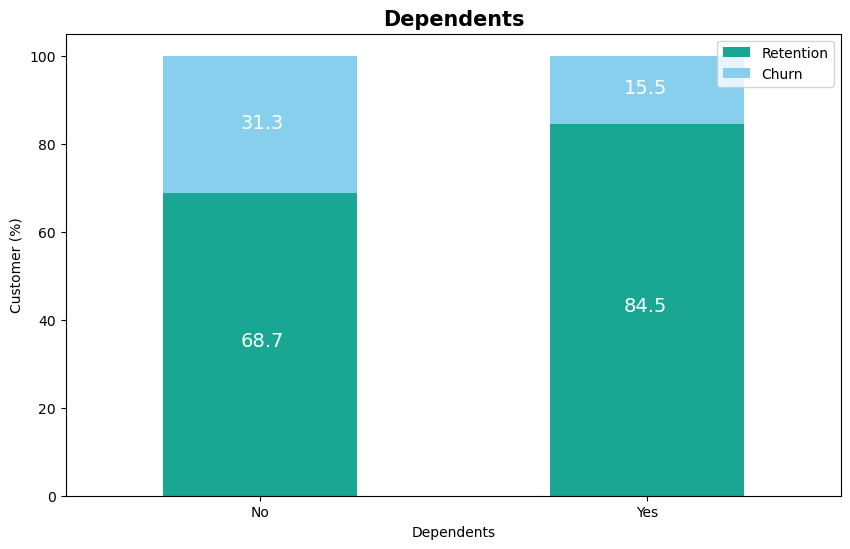

In [39]:
den = df[['customerID', 'Dependents', 'Churn']]
den = den.groupby([den['Dependents'], den['Churn']])['customerID'].count().unstack(level=1).fillna(0)
den_churn = (den.div(den.sum(axis=1), axis=0) * 100).sort_values(by='Yes', ascending=False)

plot_stacked_bars(den_churn, 'Dependents', rot_=0)

As the average churn rate is 26.5%, the chart shows that there is a significant impact from ```Dependents``` on churn rate.

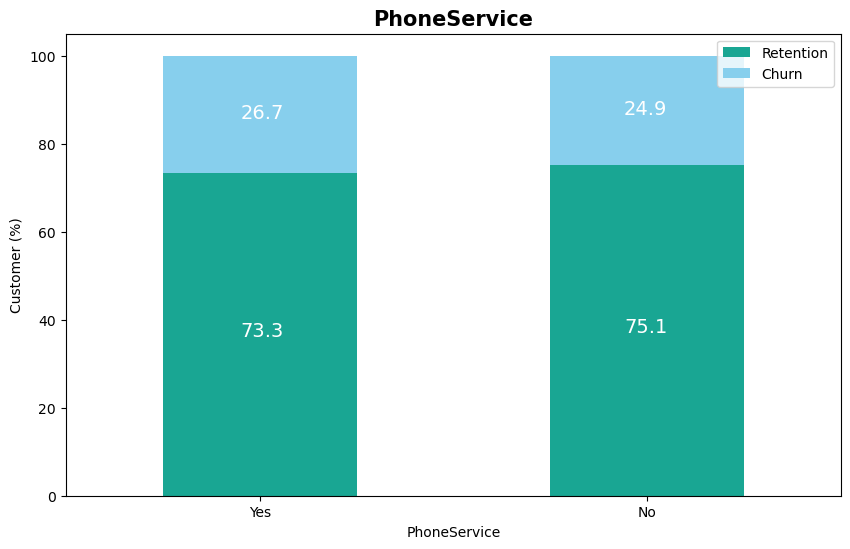

In [40]:
phone = df[['customerID', 'PhoneService', 'Churn']]
phone = phone.groupby([phone['PhoneService'], phone['Churn']])['customerID'].count().unstack(level=1).fillna(0)
phone_churn = (phone.div(phone.sum(axis=1), axis=0) * 100).sort_values(by='Yes', ascending=False)

plot_stacked_bars(phone_churn, 'PhoneService', rot_=0)

As the average churn rate is 26.5%, the chart shows that there isn't a significant impact from ```PhoneService``` on churn rate.

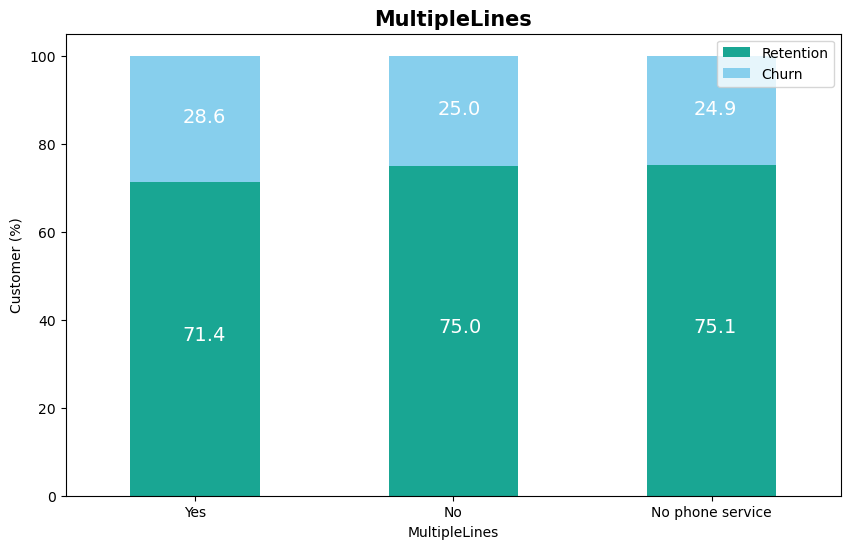

In [41]:
mul = df[['customerID', 'MultipleLines', 'Churn']]
mul = mul.groupby([mul['MultipleLines'], mul['Churn']])['customerID'].count().unstack(level=1).fillna(0)
mul_churn = (mul.div(mul.sum(axis=1), axis=0) * 100).sort_values(by='Yes', ascending=False)

plot_stacked_bars(mul_churn, 'MultipleLines', rot_=0)

As the average churn rate is 26.5%, the chart shows that there isn't a significant impact from ```MultipleLines``` on churn rate.

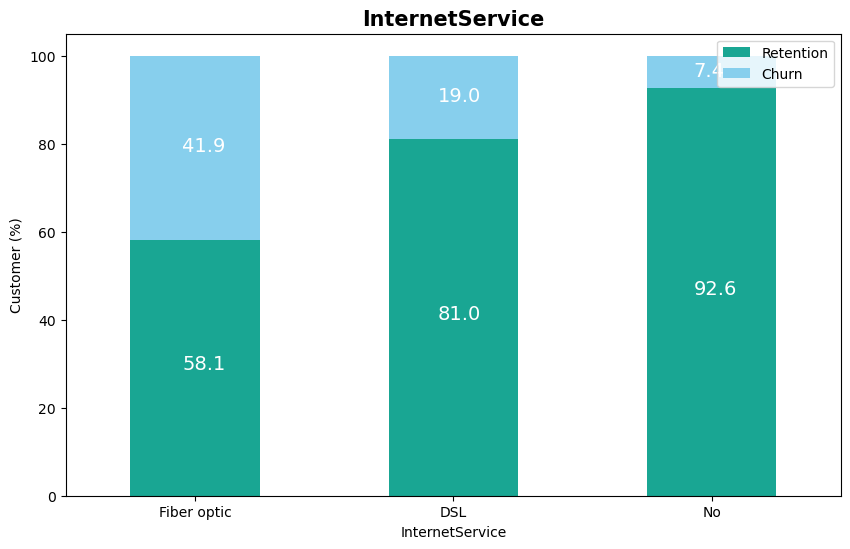

In [42]:
inter = df[['customerID', 'InternetService', 'Churn']]
inter = inter.groupby([inter['InternetService'], inter['Churn']])['customerID'].count().unstack(level=1).fillna(0)
inter_churn = (inter.div(inter.sum(axis=1), axis=0) * 100).sort_values(by='Yes', ascending=False)

plot_stacked_bars(inter_churn, 'InternetService', rot_=0)

As the average churn rate is 26.5%, the chart shows that there is a strongly significant impact from ```InternetService``` on churn rate.

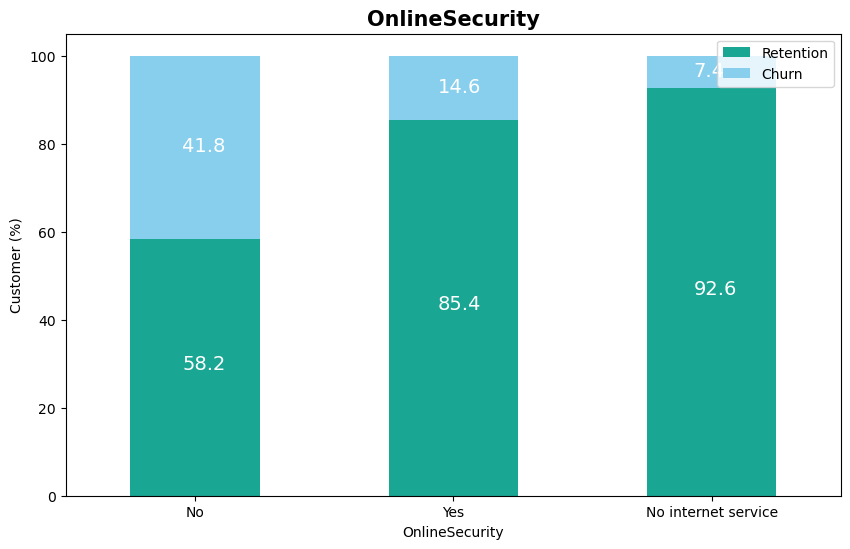

In [43]:
online = df[['customerID', 'OnlineSecurity', 'Churn']]
online = online.groupby([online['OnlineSecurity'], online['Churn']])['customerID'].count().unstack(level=1).fillna(0)
online_churn = (online.div(online.sum(axis=1), axis=0) * 100).sort_values(by='Yes', ascending=False)

plot_stacked_bars(online_churn, 'OnlineSecurity', rot_=0)

As the average churn rate is 26.5%, the chart shows that there is a strongly significant impact from ```OnlineSecurity``` on churn rate.

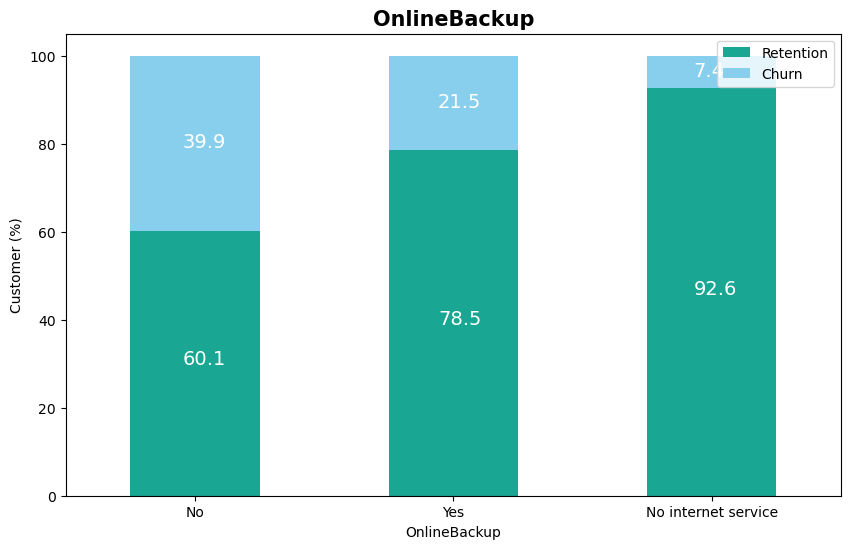

In [44]:
online2 = df[['customerID', 'OnlineBackup', 'Churn']]
online2 = online2.groupby([online2['OnlineBackup'], online2['Churn']])['customerID'].count().unstack(level=1).fillna(0)
online2_churn = (online2.div(online2.sum(axis=1), axis=0) * 100).sort_values(by='Yes', ascending=False)

plot_stacked_bars(online2_churn, 'OnlineBackup', rot_=0)

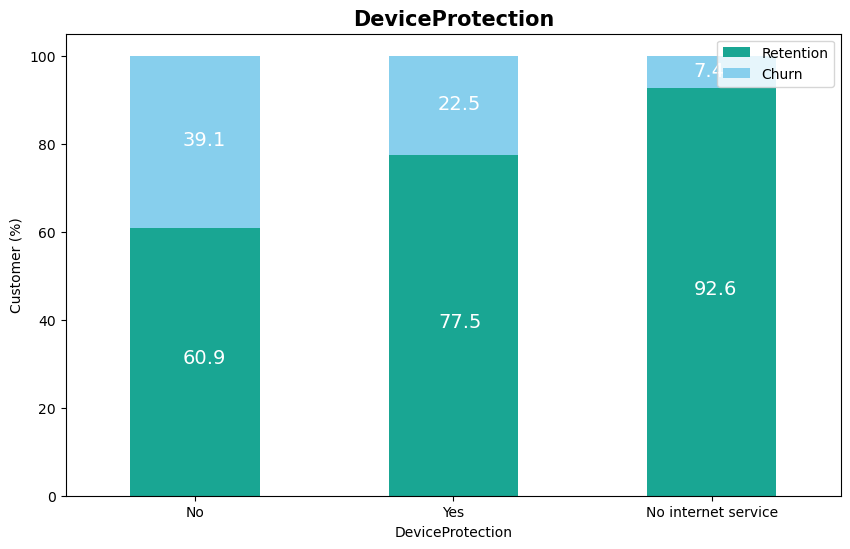

In [45]:
dev = df[['customerID', 'DeviceProtection', 'Churn']]
dev = dev.groupby([dev['DeviceProtection'], dev['Churn']])['customerID'].count().unstack(level=1).fillna(0)
dev_churn = (dev.div(dev.sum(axis=1), axis=0) * 100).sort_values(by='Yes', ascending=False)

plot_stacked_bars(dev_churn, 'DeviceProtection', rot_=0)

As the average churn rate is 26.5%, the chart shows that there is a strongly significant impact from ```DeviceProtection``` on churn rate.

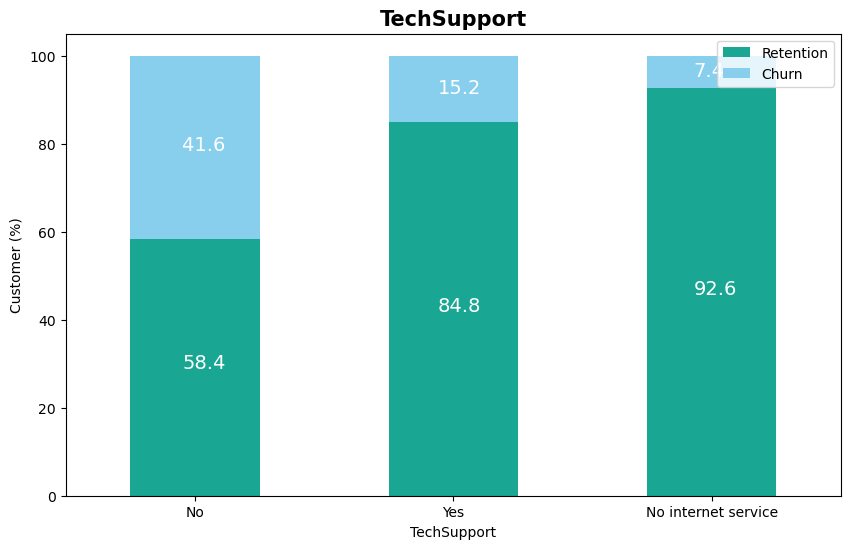

In [46]:
tech = df[['customerID', 'TechSupport', 'Churn']]
tech = tech.groupby([tech['TechSupport'], tech['Churn']])['customerID'].count().unstack(level=1).fillna(0)
tech_churn = (tech.div(tech.sum(axis=1), axis=0) * 100).sort_values(by='Yes', ascending=False)

plot_stacked_bars(tech_churn, 'TechSupport', rot_=0)

As the average churn rate is 26.5%, the chart shows that there is a strongly significant impact from ```TechSupport``` on churn rate.

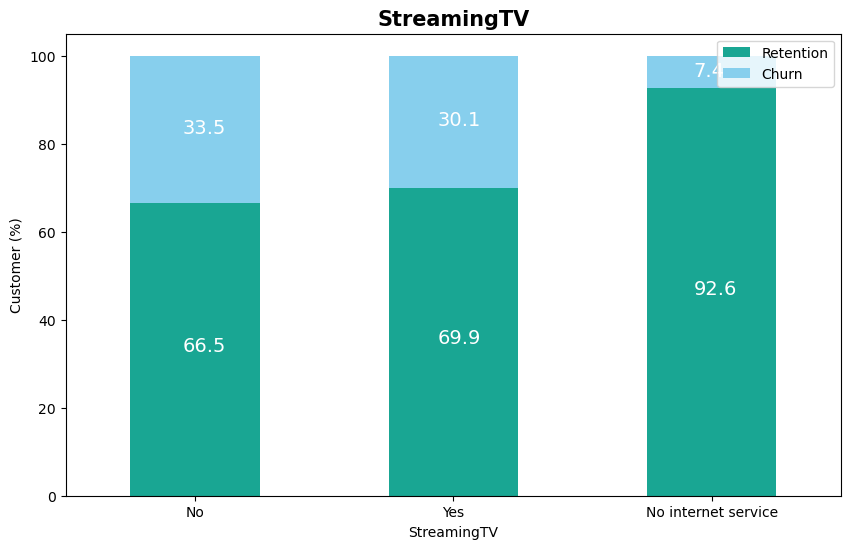

In [47]:
stream = df[['customerID', 'StreamingTV', 'Churn']]
stream = stream.groupby([stream['StreamingTV'], stream['Churn']])['customerID'].count().unstack(level=1).fillna(0)
stream_churn = (stream.div(stream.sum(axis=1), axis=0) * 100).sort_values(by='Yes', ascending=False)

plot_stacked_bars(stream_churn, 'StreamingTV', rot_=0)

As the average churn rate is 26.5%, the chart shows that there is a slightly significant impact from ```InternetService``` on churn rate.

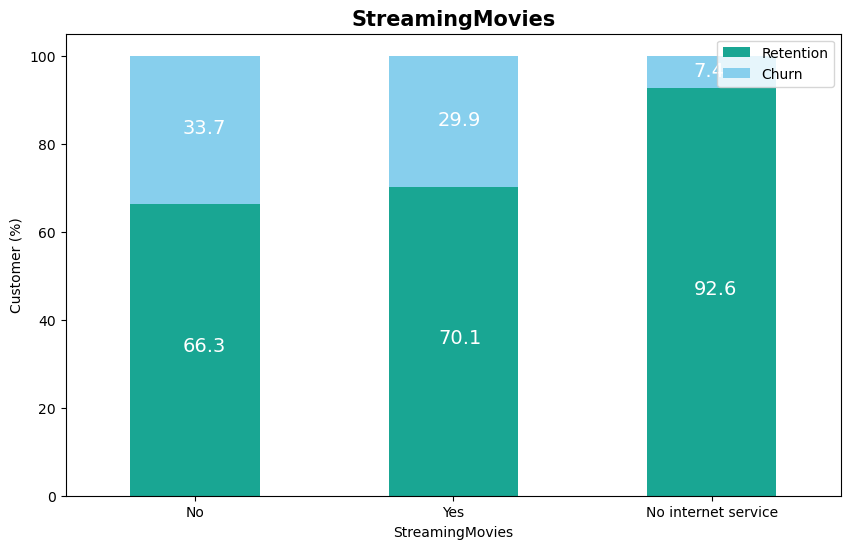

In [48]:
stream2 = df[['customerID', 'StreamingMovies', 'Churn']]
stream2 = stream2.groupby([stream2['StreamingMovies'], stream2['Churn']])['customerID'].count().unstack(level=1).fillna(0)
stream2_churn = (stream2.div(stream2.sum(axis=1), axis=0) * 100).sort_values(by='Yes', ascending=False)

plot_stacked_bars(stream2_churn, 'StreamingMovies', rot_=0)

As the average churn rate is 26.5%, the chart shows that there is a slightly significant impact from ```StreamingMovies``` on churn rate.

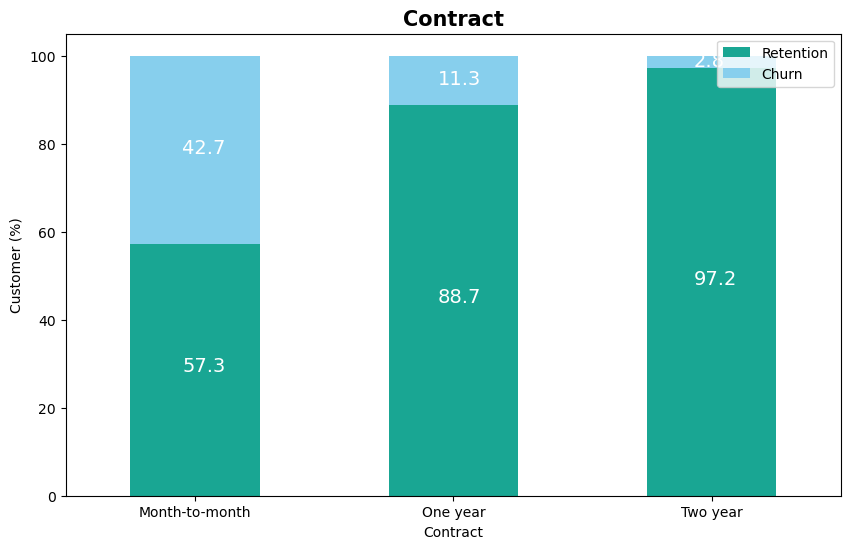

In [49]:
contract = df[['customerID', 'Contract', 'Churn']]
contract = contract.groupby([contract['Contract'], contract['Churn']])['customerID'].count().unstack(level=1).fillna(0)
contract_churn = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by='Yes', ascending=False)

plot_stacked_bars(contract_churn, 'Contract', rot_=0)

As the average churn rate is 26.5%, the chart shows that there is a strongly significant impact from ```Contract``` on churn rate.

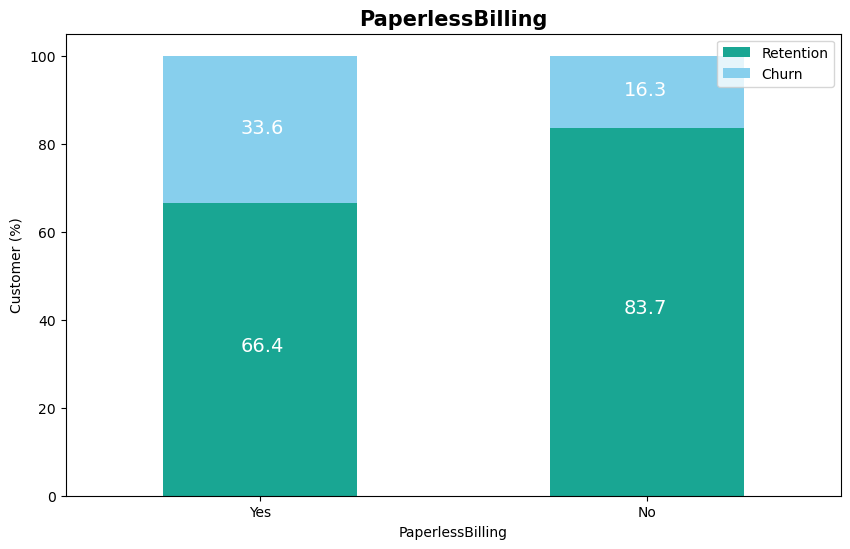

In [50]:
paper = df[['customerID', 'PaperlessBilling', 'Churn']]
paper = paper.groupby([paper['PaperlessBilling'], paper['Churn']])['customerID'].count().unstack(level=1).fillna(0)
paper_churn = (paper.div(paper.sum(axis=1), axis=0) * 100).sort_values(by='Yes', ascending=False)

plot_stacked_bars(paper_churn, 'PaperlessBilling', rot_=0)

As the average churn rate is 26.5%, the chart shows that there is a slightly significant impact from ```PaperlessBilling``` on churn rate.

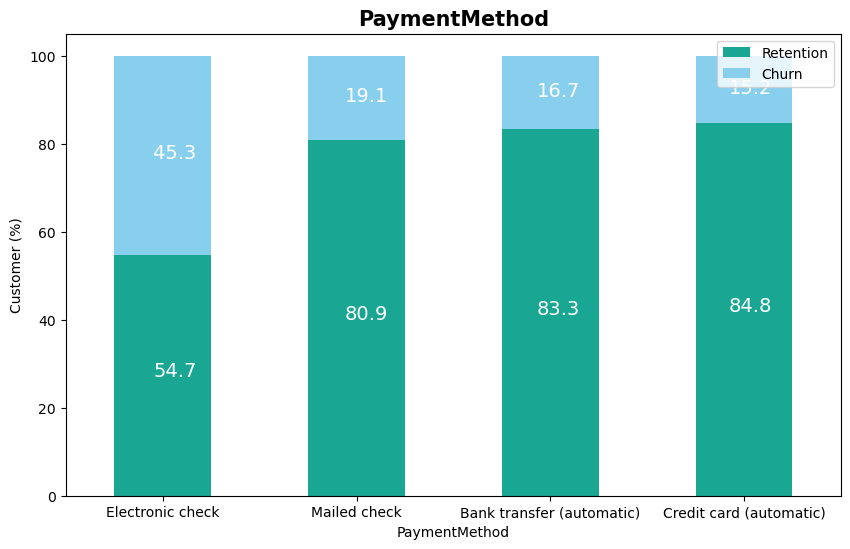

In [51]:
pay = df[['customerID', 'PaymentMethod', 'Churn']]
pay = pay.groupby([pay['PaymentMethod'], pay['Churn']])['customerID'].count().unstack(level=1).fillna(0)
pay_churn = (pay.div(pay.sum(axis=1), axis=0) * 100).sort_values(by='Yes', ascending=False)

plot_stacked_bars(pay_churn, 'PaymentMethod', rot_=0)

As the average churn rate is 26.5%, the chart shows that there is a strongly significant impact from ```PaymentMethod``` on churn rate.

**(3) Overview**

In [8]:
data_cat = df[Category_feature]

for col in Category_feature:
    col_encoded = pd.get_dummies(data_cat[col], prefix = col, drop_first = False)
    data_cat = pd.concat([data_cat, col_encoded], axis=1)
    data_cat.drop(col, axis=1, inplace=True)

data_cat.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)
data_cat.drop(['Churn_No'],axis=1, inplace=True)

data = pd.concat([df_num.loc[:,['tenure','MonthlyCharges','TotalCharges']],data_cat],axis=1)
data.head()

tenure  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
0       1           29.85         29.85              1            0   
1      34           56.95       1889.50              0            1   
2       2           53.85        108.15              0            1   
3      45           42.30       1840.75              0            1   
4       2           70.70        151.65              1            0   

   SeniorCitizen_0  SeniorCitizen_1  Partner_No  Partner_Yes  Dependents_No  \
0                1                0           0            1              1   
1                1                0           1            0              1   
2                1                0           1            0              1   
3                1                0           1            0              1   
4                1                0           1            0              1   

   ...  Contract_Month-to-month  Contract_One year  Contract_Two year  \
0  ...                        1                  0                  0   
1  ...                        0                  1                  0   
2  ...                        1                  0                  0   
3  ...                        0                  1                  0   
4  ...                        1                  0                  0   

   PaperlessBilling_No  PaperlessBilling_Yes  \
0                    0                     1   
1                    1                     0   
2                    0                     1   
3                    1                     0   
4                    0                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  Churn  
0                           0      0  
1                           1      0  
2                           1      1  
3                           0      0  
4                           0      1  

[5 rows x 47 columns]

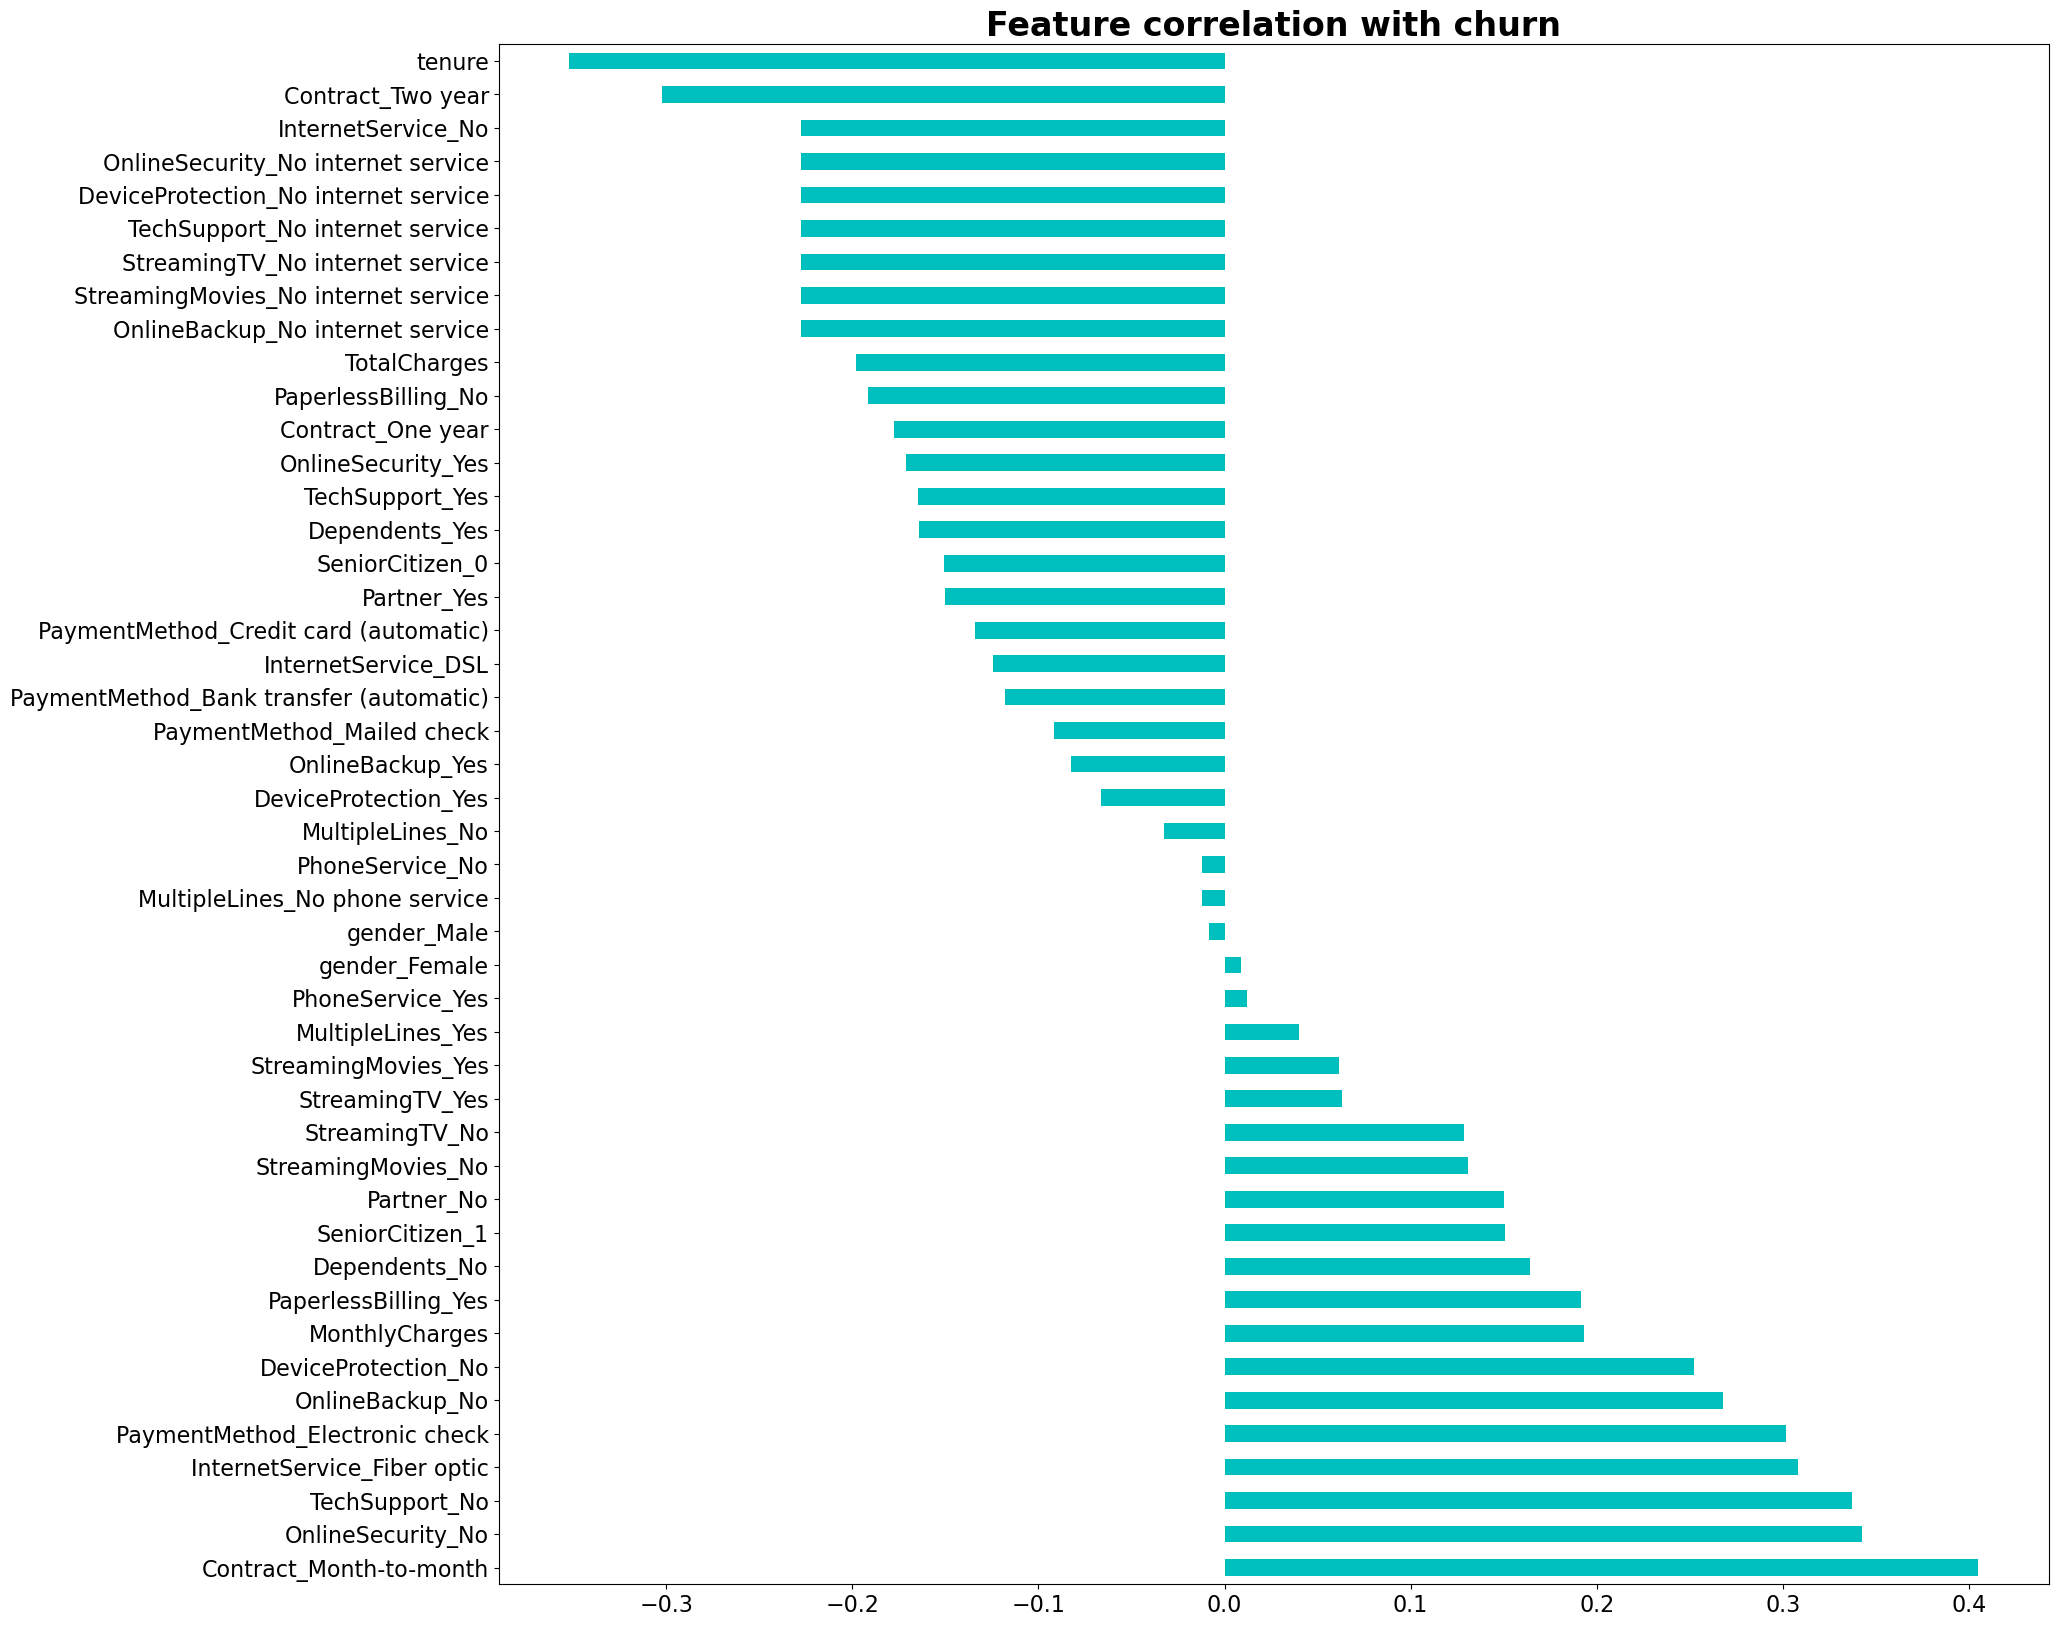

In [113]:
fig = plt.figure(figsize = (20,20))
ax = plt.subplot()
data.corr()['Churn'].drop('Churn').sort_values(ascending = False).plot(kind = 'barh', color = 'c')
plt.title('Feature correlation with churn', fontsize = 24, fontweight='bold')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16);

### PART 3: Feature Engineering & Machine Learning Modelling

**1.  Perform feature encoding on the data**

To reduce the collinearity of variables, delete one of the two encoded results from every binary variable:

In [9]:
data_cat = df[Category_feature]

for col in Category_feature:
    col_encoded = pd.get_dummies(data_cat[col], prefix = col, drop_first = False)
    data_cat = pd.concat([data_cat, col_encoded], axis=1)
    data_cat.drop(col, axis=1, inplace=True)

data_cat.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)
data_cat.drop(['gender_Male','SeniorCitizen_0','Partner_No','Dependents_No','PhoneService_No','Churn_No'],axis=1, inplace=True)
data_cat.head()

gender_Female  SeniorCitizen_1  Partner_Yes  Dependents_Yes  \
0              1                0            1               0   
1              0                0            0               0   
2              0                0            0               0   
3              0                0            0               0   
4              1                0            0               0   

   PhoneService_Yes  MultipleLines_No  MultipleLines_No phone service  \
0                 0                 0                               1   
1                 1                 1                               0   
2                 1                 1                               0   
3                 0                 0                               1   
4                 1                 1                               0   

   MultipleLines_Yes  InternetService_DSL  InternetService_Fiber optic  ...  \
0                  0                    1                            0  ...   
1                  0                    1                            0  ...   
2                  0                    1                            0  ...   
3                  0                    1                            0  ...   
4                  0                    0                            1  ...   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   
1                        0                  1                  0   
2                        1                  0                  0   
3                        0                  1                  0   
4                        1                  0                  0   

   PaperlessBilling_No  PaperlessBilling_Yes  \
0                    0                     1   
1                    1                     0   
2                    0                     1   
3                    1                     0   
4                    0                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  Churn  
0                           0      0  
1                           1      0  
2                           1      1  
3                           0      0  
4                           0      1  

[5 rows x 39 columns]

Merge the categorical variables and numerical variables after completing feature engineering:

In [10]:
data_final = pd.concat([df_num.loc[:,['tenure','MonthlyCharges','TotalCharges']],data_cat],axis=1)
data_final.head()

tenure  MonthlyCharges  TotalCharges  gender_Female  SeniorCitizen_1  \
0       1           29.85         29.85              1                0   
1      34           56.95       1889.50              0                0   
2       2           53.85        108.15              0                0   
3      45           42.30       1840.75              0                0   
4       2           70.70        151.65              1                0   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  MultipleLines_No  \
0            1               0                 0                 0   
1            0               0                 1                 1   
2            0               0                 1                 1   
3            0               0                 0                 0   
4            0               0                 1                 1   

   MultipleLines_No phone service  ...  Contract_Month-to-month  \
0                               1  ...                        1   
1                               0  ...                        0   
2                               0  ...                        1   
3                               1  ...                        0   
4                               0  ...                        1   

   Contract_One year  Contract_Two year  PaperlessBilling_No  \
0                  0                  0                    0   
1                  1                  0                    1   
2                  0                  0                    0   
3                  1                  0                    1   
4                  0                  0                    0   

   PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
0                     1                                        0   
1                     0                                        0   
2                     1                                        0   
3                     0                                        1   
4                     1                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  Churn  
0                           0      0  
1                           1      0  
2                           1      1  
3                           0      0  
4                           0      1  

[5 rows x 42 columns]

**2.  Apply Random Forest algorithm on data**

In [11]:
X = data_final.drop('Churn',axis=1)
y = data_final['Churn']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
predictions = model.predict(X_test)

from sklearn import metrics

tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 172
False positives: 91
True negatives: 945
False negatives: 201

Accuracy: 0.7927608232789212
Precision: 0.6539923954372624
Recall: 0.46112600536193027


In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predictions, y_test)

array([[945, 201],
       [ 91, 172]], dtype=int64)

Although the overall accuracy is acceptable, the precision and recall, the main indicators showing the model's performance in identifying churn customers, are very low. The main reason for this situation should be that the churn customers are only about one-third of retained customers, reflecting the model's insensitivity to minor (positive) cases. Therefore, more in-depth feature engineering should be conducted before training the model:

**3.  Go back to feature engineering & re-modelling**

Three further steps in feature engineering are:

(1) Normalisation processing

(2) Delete encoded features

(3) Oversampling

In [14]:
data2 = data_final
data2.head()

tenure  MonthlyCharges  TotalCharges  gender_Female  SeniorCitizen_1  \
0       1           29.85         29.85              1                0   
1      34           56.95       1889.50              0                0   
2       2           53.85        108.15              0                0   
3      45           42.30       1840.75              0                0   
4       2           70.70        151.65              1                0   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  MultipleLines_No  \
0            1               0                 0                 0   
1            0               0                 1                 1   
2            0               0                 1                 1   
3            0               0                 0                 0   
4            0               0                 1                 1   

   MultipleLines_No phone service  ...  Contract_Month-to-month  \
0                               1  ...                        1   
1                               0  ...                        0   
2                               0  ...                        1   
3                               1  ...                        0   
4                               0  ...                        1   

   Contract_One year  Contract_Two year  PaperlessBilling_No  \
0                  0                  0                    0   
1                  1                  0                    1   
2                  0                  0                    0   
3                  1                  0                    1   
4                  0                  0                    0   

   PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
0                     1                                        0   
1                     0                                        0   
2                     1                                        0   
3                     0                                        1   
4                     1                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  Churn  
0                           0      0  
1                           1      0  
2                           1      1  
3                           0      0  
4                           0      1  

[5 rows x 42 columns]

**(1) Normalisation processing**

As some machine learning algorithms are sensitive to the scale of the features, three numerical features (```tenure```, ```MonthlyCharges```, ```TotalCharges```) should be converted to similar scales as other categorical features (between 0 and 1).

In [15]:
data2['tenure'] = (data2['tenure'] - data2['tenure'].min()) / (data2['tenure'].max() - data2['tenure'].min())
data2['MonthlyCharges'] = (data2['MonthlyCharges'] - data2['MonthlyCharges'].min()) / (data2['MonthlyCharges'].max() - data2['MonthlyCharges'].min())
data2['TotalCharges'] = (data2['TotalCharges'] - data2['TotalCharges'].min()) / (data2['TotalCharges'].max() - data2['TotalCharges'].min())

Standardisation Processing (alternative option)

In [ ]:
'''
data2['tenure'] = (data2['tenure'] - data2['tenure'].mean()) / data2['tenure'].std()
data2['MonthlyCharges'] = (data2['MonthlyCharges'] - data2['MonthlyCharges'].mean()) / data2['MonthlyCharges'].std()
data2['TotalCharges'] = (data2['TotalCharges'] - data2['TotalCharges'].mean()) / data2['TotalCharges'].std()
'''

In [264]:
data2.to_excel('20230911_data2.xlsx', index=False)

**(2) Delete encoded features**

Based on the following correlation matrix analysis, a considerable amount of features highly correlated with each other, indicating that many features show the same or very similar information. Therefore, some encoded features should be deleted.

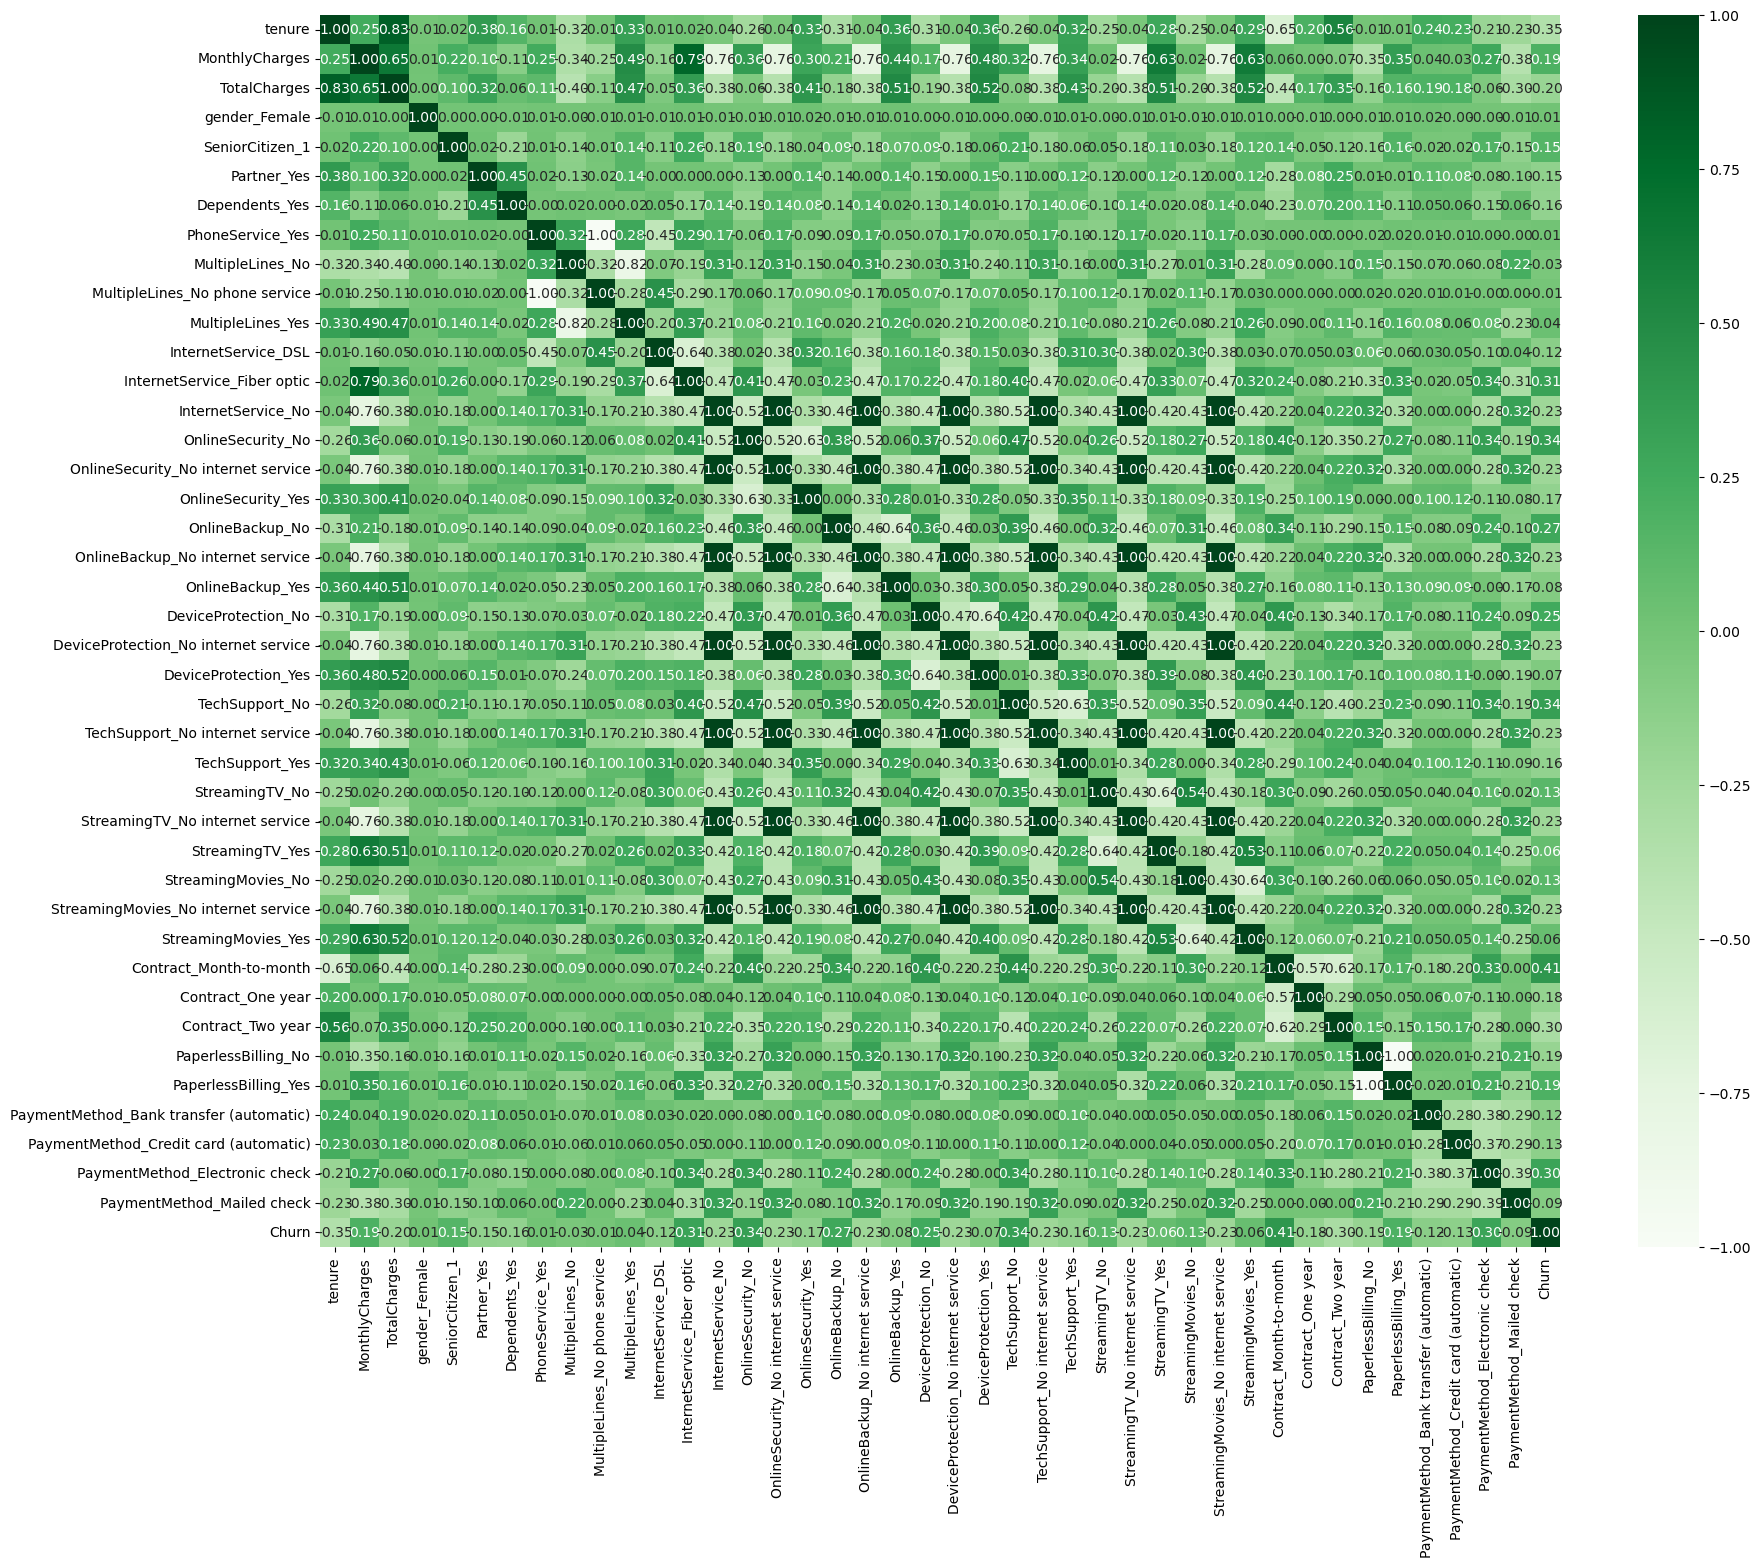

In [68]:
corr = data2.corr()

plt.figure(figsize=(20,16))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='Greens', annot = True, annot_kws={'size':10}, fmt='.2f')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Apart from features with duplicate information, ```MonthlyCharges``` and ```InternetService_Fiber optic``` exhibit a high correlation. Considering that both features significantly affect the churn rate, it indicates that customers are generally dissatisfied with the price or experience of this internet service.

In [69]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

X = data2.drop(['Churn','OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service',
               'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service','PaperlessBilling_No',
                'MultipleLines_No phone service','MultipleLines_No','PaperlessBilling_No','StreamingMovies_Yes',
               'StreamingTV_Yes','TechSupport_Yes','DeviceProtection_Yes','OnlineBackup_Yes','OnlineSecurity_Yes'], axis=1)
y = data2['Churn']

**(3) Oversampling**

This is the most important procedure. As there is a significant imbalance between churn and not churn. Oversampling can increase the number of instances in the churn cases to balance the dataset, and then improve the performance of the learning algorithm.

In [70]:
smote = SMOTE(random_state=42)
X_over, y_over = smote.fit_resample(X, y)

**(4) Find better parameters to train the model**

In [72]:
param_distribs = {
    'n_estimators': randint(low=10, high=1000),
    'min_samples_leaf': randint(low=1, high=4),
}
rf = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(rf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(X_over, y_over)
print(rnd_search.best_params_)

{'min_samples_leaf': 1, 'n_estimators': 779}


**(5) Re-apply Random Forest algorithm on the data**

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.20, random_state=42)
model = RandomForestClassifier(min_samples_leaf=1,n_estimators=779)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

from sklearn import metrics

tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 937
False positives: 193
True negatives: 828
False negatives: 112

Accuracy: 0.8526570048309179
Precision: 0.8292035398230089
Recall: 0.8932316491897044


Through further feature engineering and retraining of the model, the overall accuracy of the model has been improved, and more importantly, the precision and recall indicators have been significantly improved.Therefore, the retrained model has better performance in identifying churn customers.

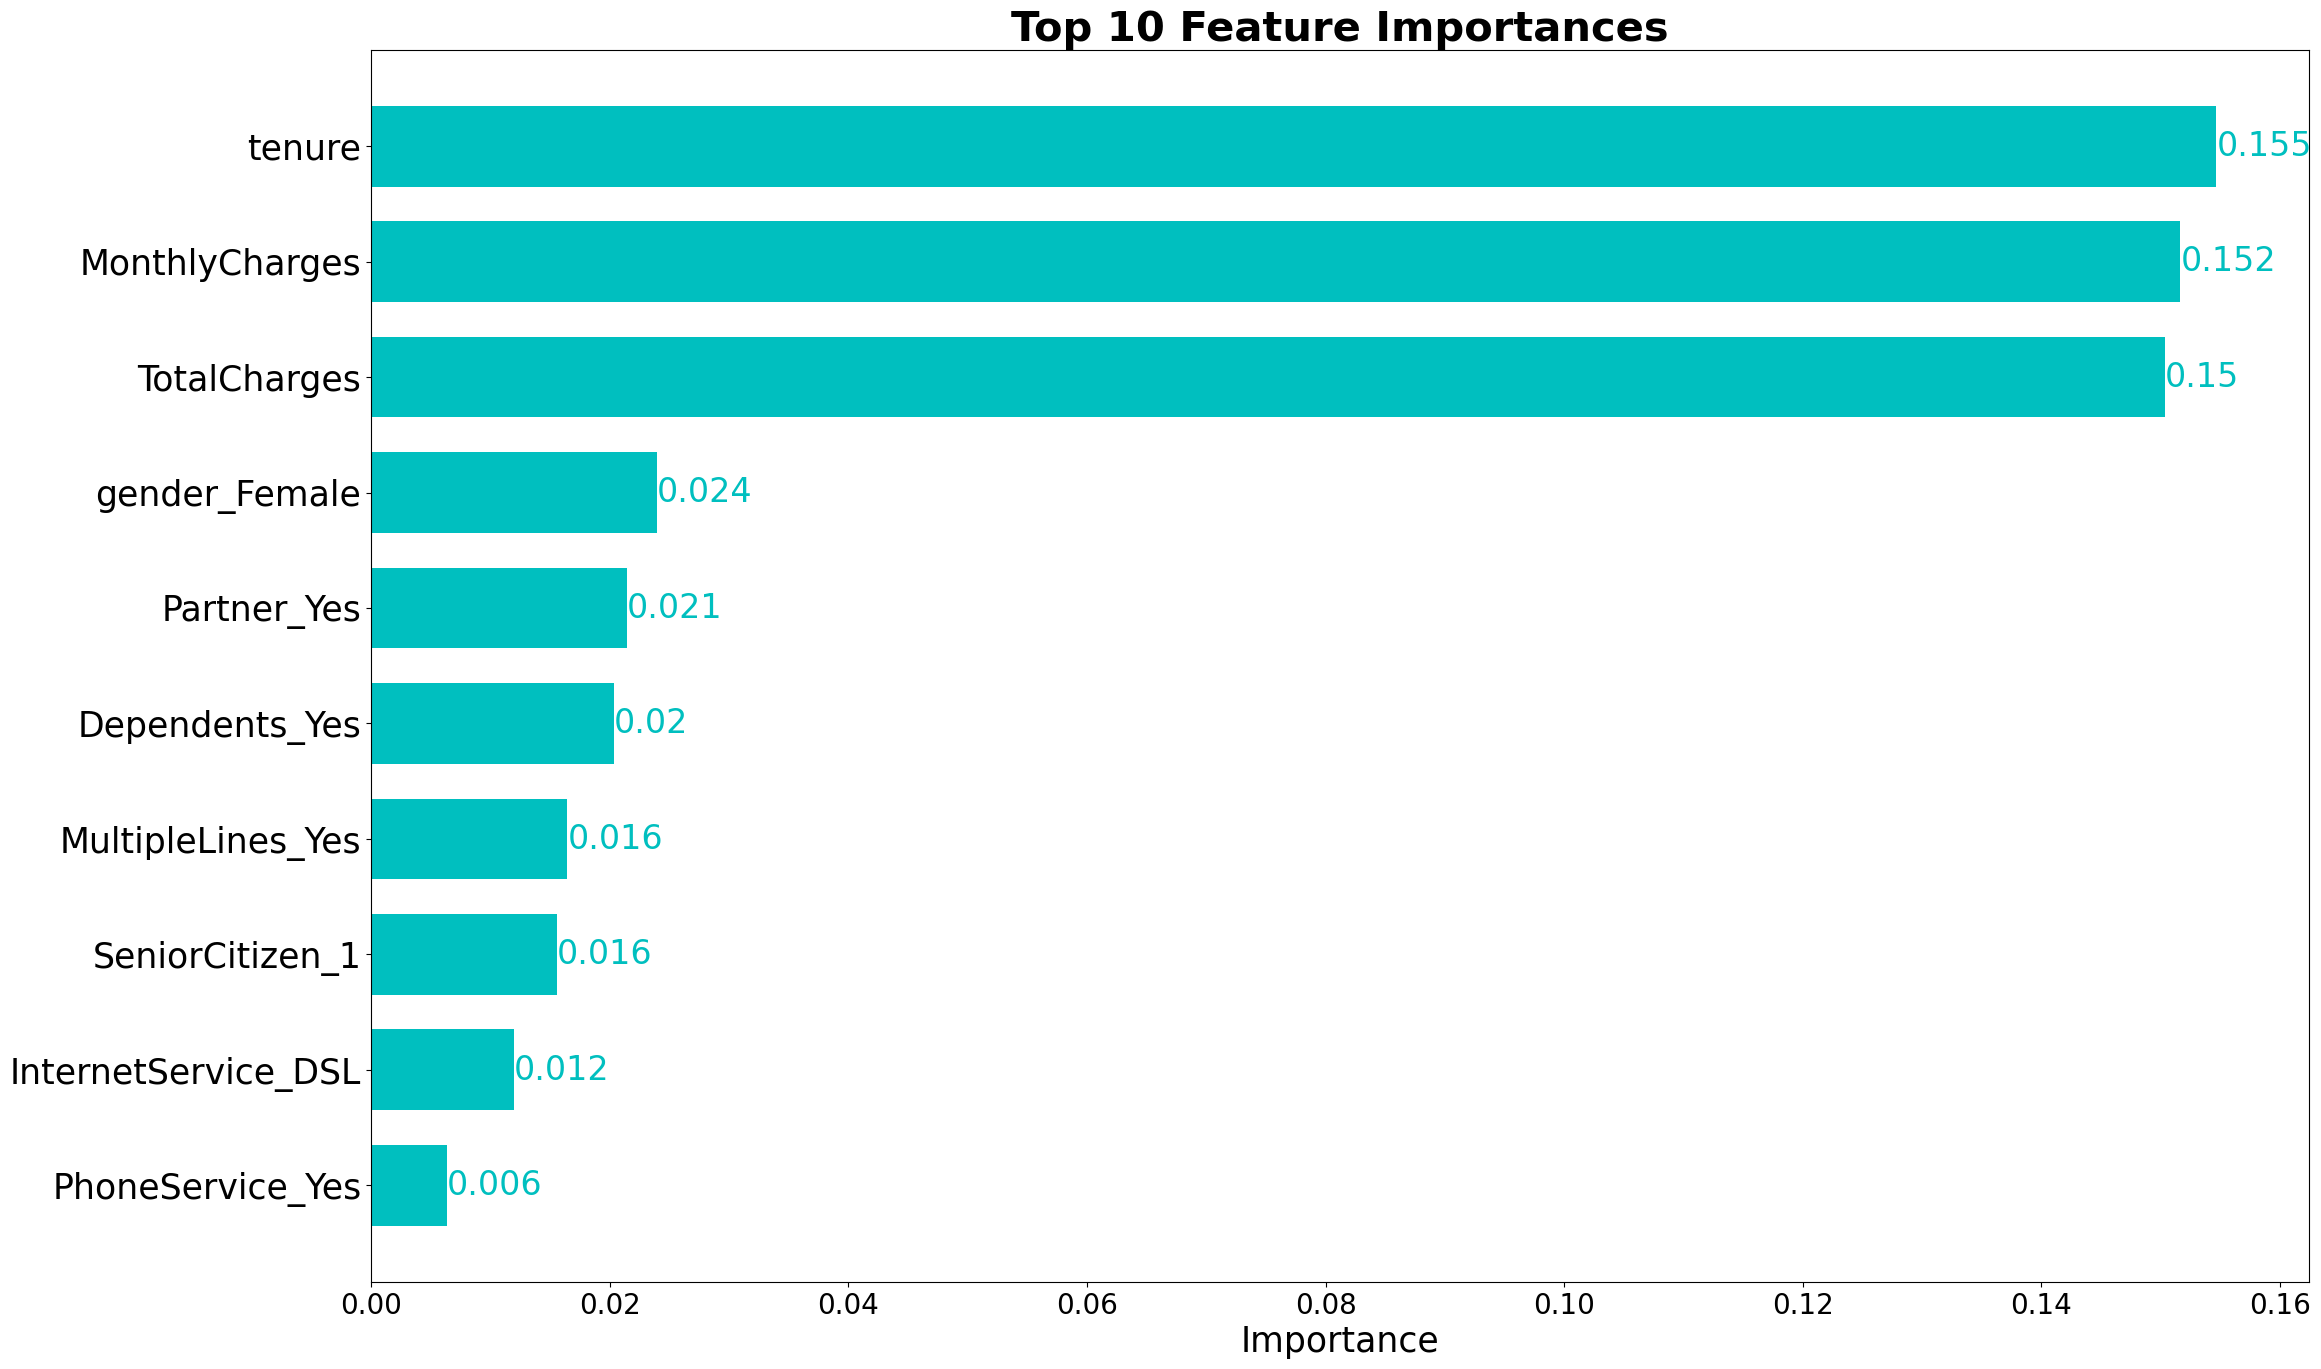

In [74]:
feature_importances = pd.DataFrame({
    'features': X_train.columns[:10],
    'importance': model.feature_importances_[:10]
}).sort_values(by='importance', ascending=True).reset_index()

plt.figure(figsize=(25, 16))
plt.title('Top 10 Feature Importances', fontsize=30, fontweight='bold')
plt.barh(range(len(feature_importances[:10])), feature_importances['importance'], color='c', align='center',height=0.7)
plt.yticks(range(len(feature_importances[:10])), feature_importances['features'], fontsize=25)
plt.xticks(fontsize=20)
plt.xlabel('Importance', fontsize=25)

for i in range(len(feature_importances[:10])):
    plt.text(
        feature_importances.loc[i, 'importance'], i, round(feature_importances.loc[i, 'importance'], 3),
        ha='left', va='center', fontsize=24, color='c'
    )
    
plt.show()

**Notice: The correlation analysis between features and churn needs to be distinguished from the feature importance of Random Forest models.**

The correlation analysis results show how strongly different features are related to the churn rate, considering only linear relationships. On the other hand, the feature importance of Random Forest models considers both linear and nonlinear relationships and reveals how much each feature contributes to the overall predictive power of the model.

It's important to understand that the higher feature importances of numerical features compared to categorical features might be due to the fact that numerical features can take on a range of values, while categorical features typically have only two values (0 or 1). Therefore, the numerical features have a wider range of potential impact on the churn rate, leading to higher feature importances.

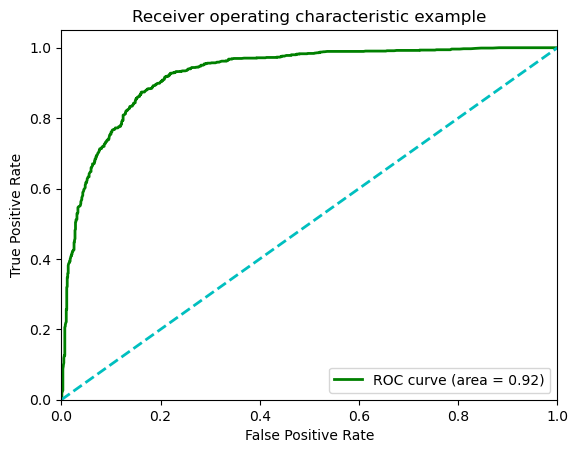

In [75]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='g',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='c', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

An AUC (Area Under the Curve) value of 0.92 signifies a highly accurate and effective classification model, providing a high level of confidence in its predictions.

**4.  Apply other algorithms on data**

In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [77]:
models = []

models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVC',SVC()))

In [78]:
for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score
    
    print(confusion_matrix(predictions, y_test))

    print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
    print(f"Precision: {metrics.precision_score(y_test, predictions)}")
    print(f"Recall: {metrics.recall_score(y_test, predictions)}")
    print('\n')

LogisticRegression
[[773 160]
 [248 889]]
Accuracy: 0.8028985507246377
Precision: 0.781882145998241
Recall: 0.8474737845567207


Naive Bayes
[[711 177]
 [310 872]]
Accuracy: 0.7647342995169082
Precision: 0.7377326565143824
Recall: 0.8312678741658722


RandomForest
[[831 123]
 [190 926]]
Accuracy: 0.8487922705314009
Precision: 0.8297491039426523
Recall: 0.882745471877979


Decision Tree
[[793 215]
 [228 834]]
Accuracy: 0.7859903381642512
Precision: 0.7853107344632768
Recall: 0.7950428979980935


KNN
[[734 111]
 [287 938]]
Accuracy: 0.8077294685990338
Precision: 0.7657142857142857
Recall: 0.894184938036225


SVC
[[791 157]
 [230 892]]
Accuracy: 0.8130434782608695
Precision: 0.7950089126559715
Recall: 0.8503336510962822




Compared with other models, Random Forest achieves the best performance. This is due to the significant advantages of Random Forest in handling nonlinear relationships and high-dimensional features.

### PART 4: Explore the Underneath Mechanism of Models

The purpose of this part is to visualise various classifers' decision boundaries, and to see how they affect the classifer's decision boundary and accuracy.

**1. Perform Principal Component Analysis (PCA) on the data**

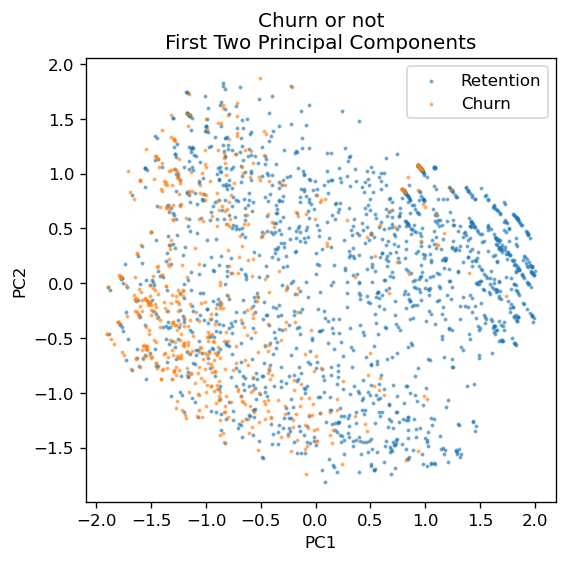

In [25]:
%matplotlib inline

from sklearn.decomposition import PCA

df2 = data2.sample(frac=0.3)

X = df2.drop(['Churn','OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service',
               'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service','PaperlessBilling_No',
                'MultipleLines_No phone service','MultipleLines_No','PaperlessBilling_No','StreamingMovies_Yes',
               'StreamingTV_Yes','TechSupport_Yes','DeviceProtection_Yes','OnlineBackup_Yes','OnlineSecurity_Yes'], axis=1)
y = df2.iloc[:,-1]

pca = PCA(n_components=2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='Retention', s=2)
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='Churn', s=2)
plt.legend()
plt.title('Churn or not\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')

As shown in the figure, after reducing features to 2D through PCA, most data representing churn customers are aggregated in the negative side of the first principal component (PC1). This indicates that after reasonable feature engineering processing, features can highlight the distribution pattern of churn customers through the visualisation, which is helpful for training various models.

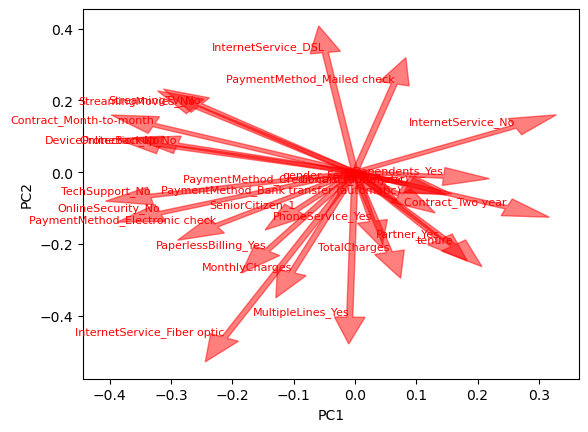

In [38]:
components = pca.components_

for i, (comp1, comp2) in enumerate(zip(components[0], components[1])):
    plt.arrow(0, 0, comp1, comp2, color='r', alpha=0.5, width=0.01, head_width=0.05)
    plt.text(comp1, comp2, X.columns[i], color='r', fontsize=8, ha='right', va='bottom')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [26]:
pca = PCA(n_components=2)
pca.fit(X)
pca.components_

array([[ 0.16089984, -0.10304298,  0.05623227,  0.02022336, -0.09620688,
         0.13867151,  0.14476204,  0.02846431, -0.00849219, -0.04835067,
        -0.21279285,  0.26114352, -0.31756938, -0.28985766, -0.31806094,
        -0.33363346, -0.25233111, -0.26065006, -0.32807973,  0.08052755,
         0.24755218, -0.14364537,  0.07440145,  0.0880222 , -0.22667889,
         0.06425524],
       [-0.20430888, -0.27971817, -0.22291577, -0.02339976, -0.10582306,
        -0.1871141 , -0.0119431 , -0.13701408, -0.4038621 ,  0.33366893,
        -0.46078894,  0.12712001, -0.11394604,  0.07645353,  0.07601689,
        -0.06621427,  0.18711799,  0.18348624,  0.13162039, -0.03373491,
        -0.09788548, -0.21843722, -0.06443108, -0.03384071, -0.14856308,
         0.24683486]])

In [27]:
pca.explained_variance_ratio_

array([0.2225904 , 0.13012203])

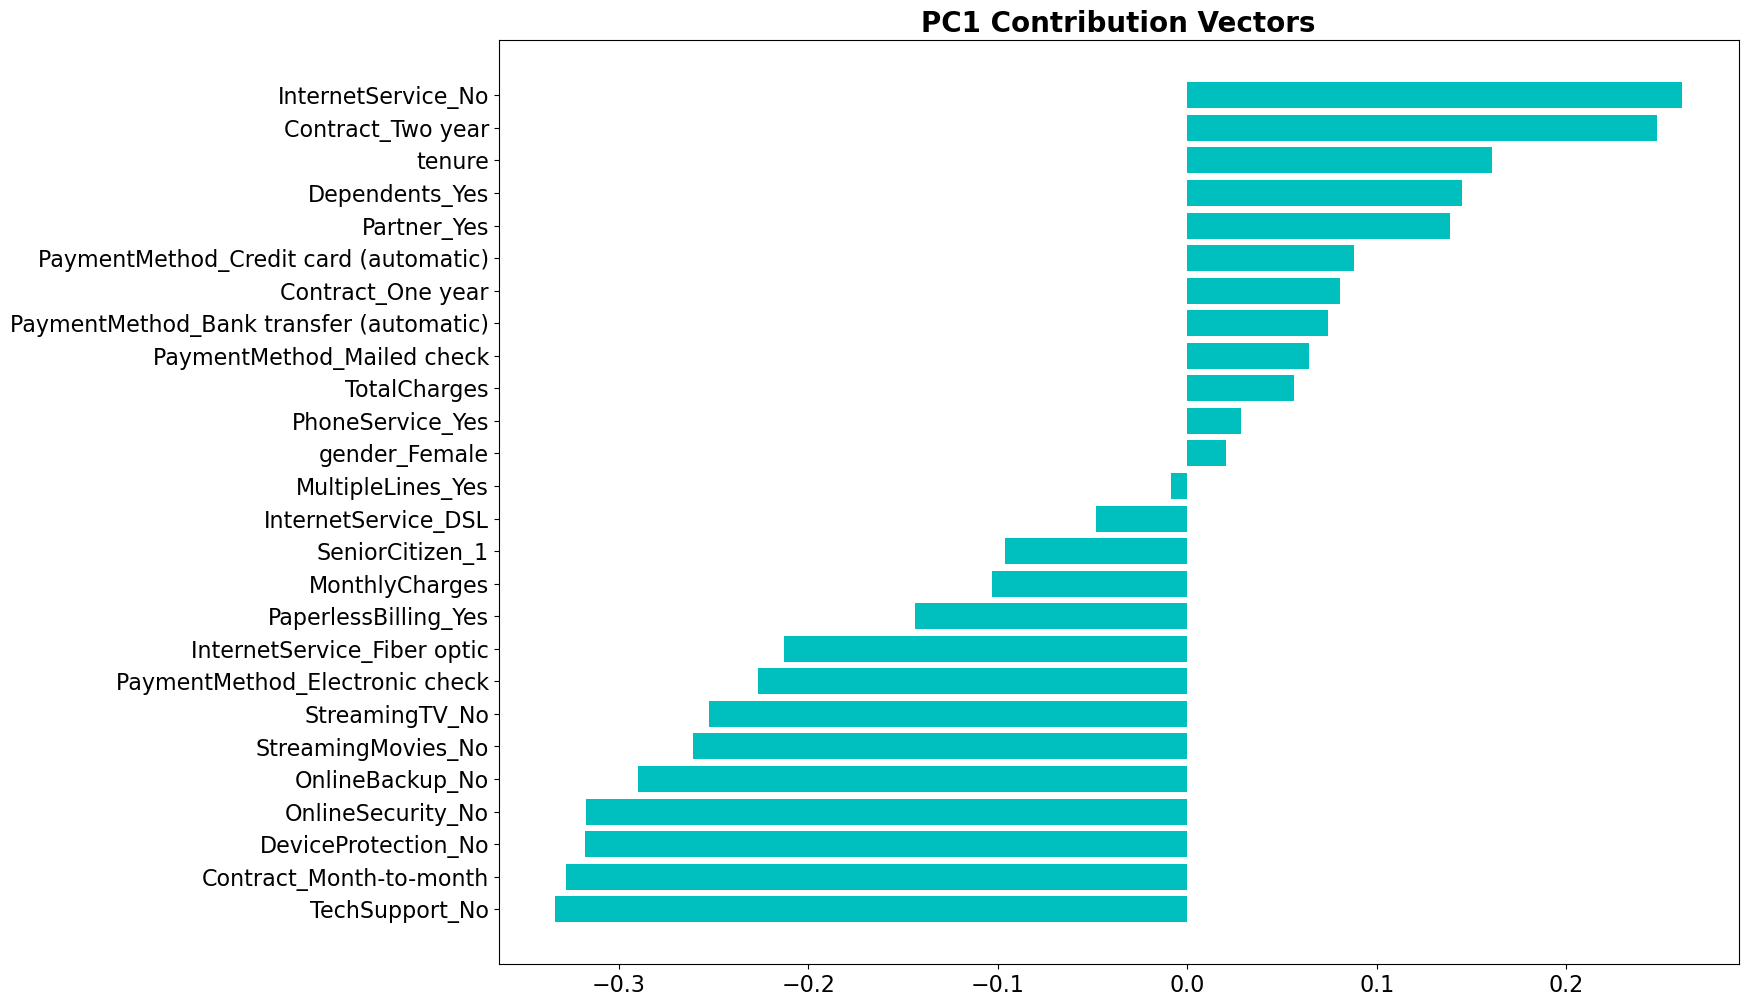

In [28]:
plt.figure(figsize=(16, 12))
sorted_idx = np.argsort(pca.components_[0])
sorted_columns = X.columns[sorted_idx]
sorted_values = pca.components_[0][sorted_idx]

plt.barh(sorted_columns, sorted_values, color='c')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('PC1 Contribution Vectors', fontsize = 20, fontweight='bold');

The distribution pattern of features' contribution to PC1 and their correlation with Churn is highly similar, indicating the model's credibility.

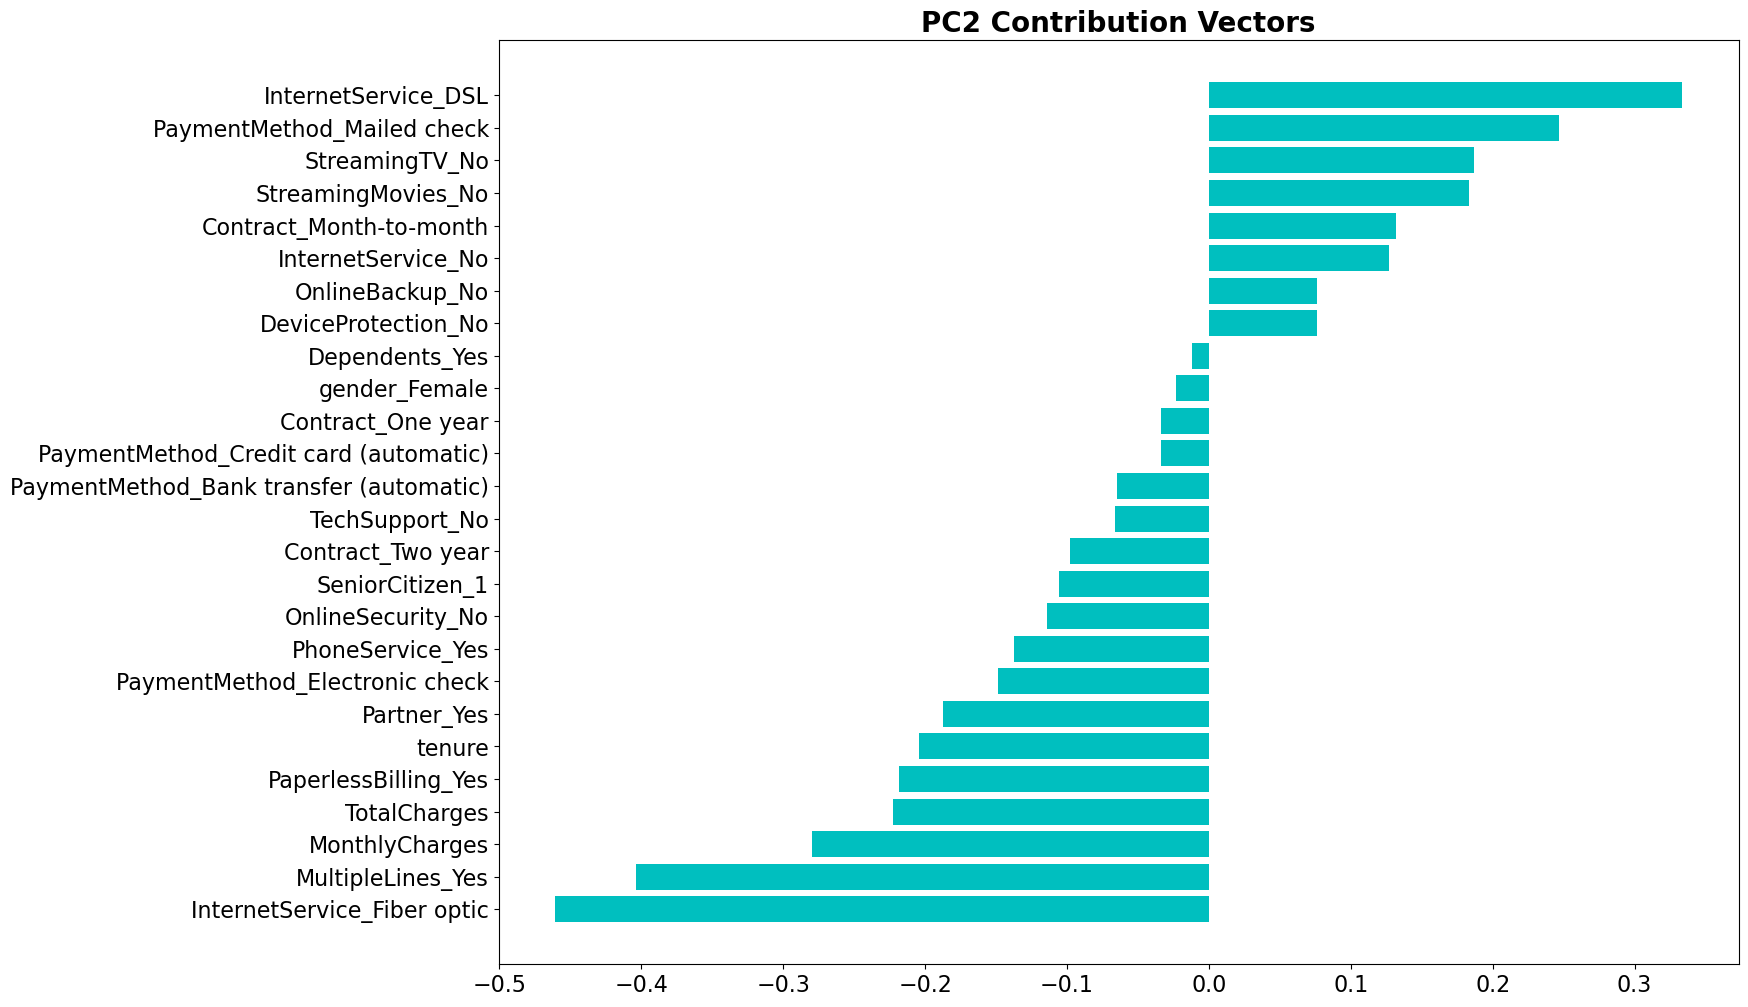

In [29]:
plt.figure(figsize=(16, 12))
sorted_idx = np.argsort(pca.components_[1])
sorted_columns = X.columns[sorted_idx]
sorted_values = pca.components_[1][sorted_idx]

plt.barh(sorted_columns, sorted_values, color='c')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('PC2 Contribution Vectors', fontsize = 20, fontweight='bold');

**2. Visualise the Decision Boundary of Models**

In [226]:
from sklearn.metrics import precision_score, recall_score

def plot_churn_or_not(X, y, fitted_model):

    plt.figure(figsize=(12,5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)

        mesh_step_size = 0.01
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.4, label='Retention', s=5)
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.4, label='Churn', s=5)
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

By visualising the decision boundaries of several models, it can be concluded that Random Forest can better find complex nonlinear relationships, which will play an advantage in real high-dimensional models:

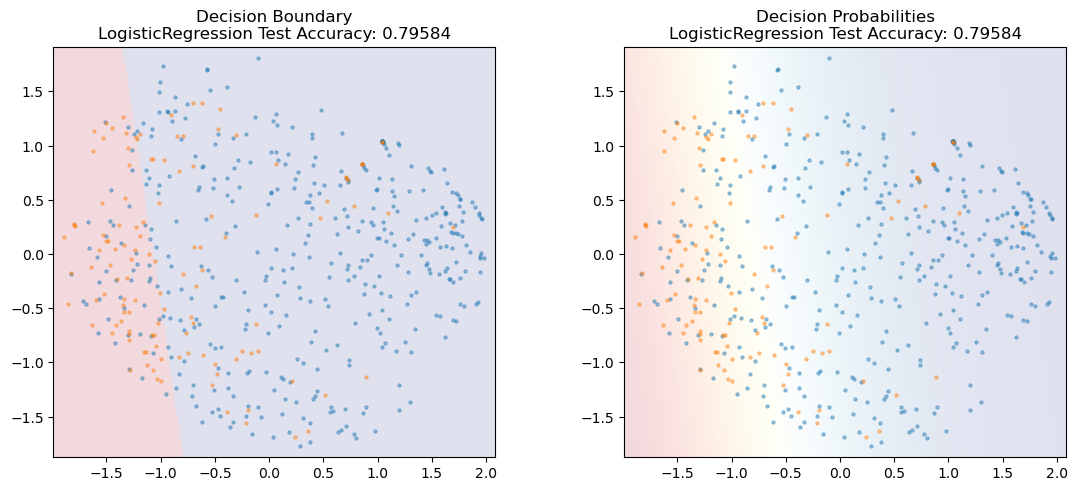

In [242]:
%matplotlib inline

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

plot_churn_or_not(X_test, y_test, model)

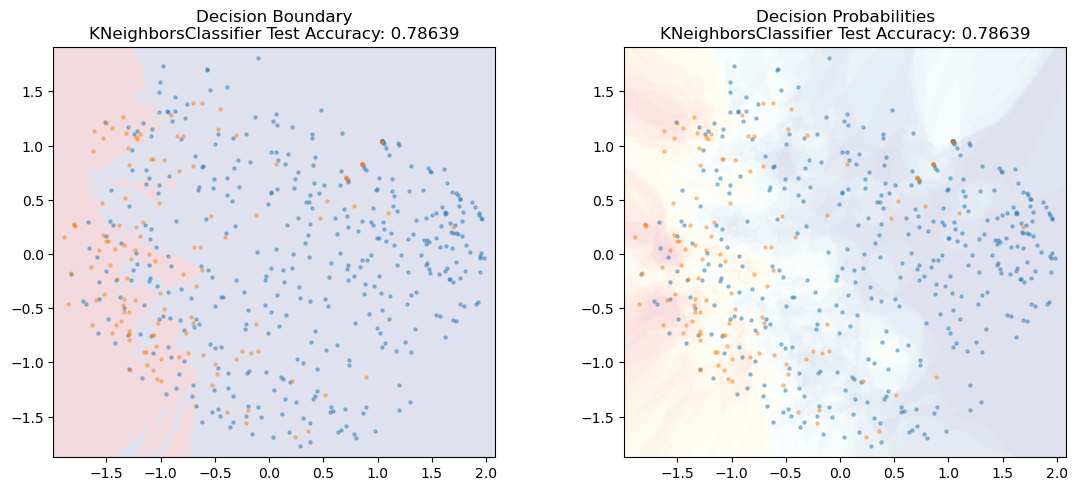

In [243]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train, y_train)

plot_churn_or_not(X_test, y_test, model)

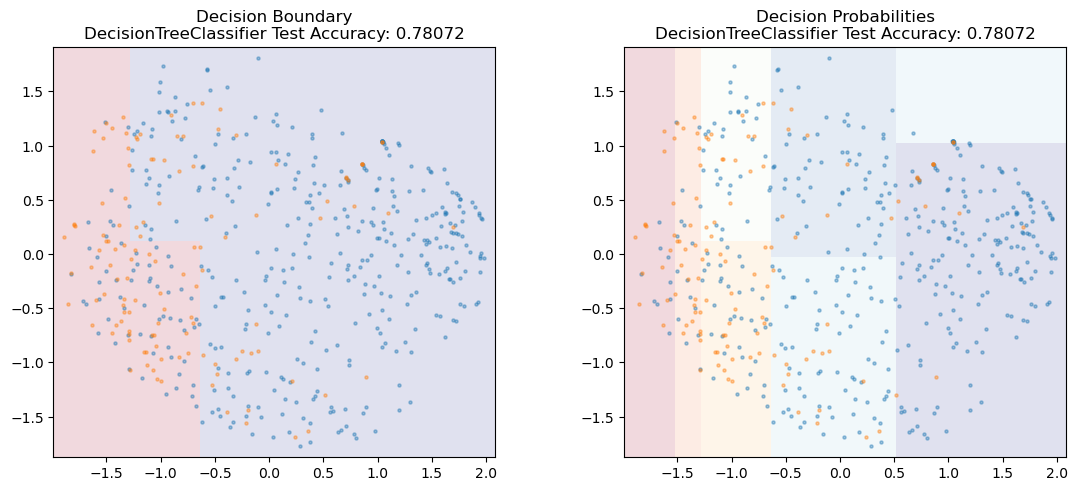

In [244]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

plot_churn_or_not(X_test, y_test, model)

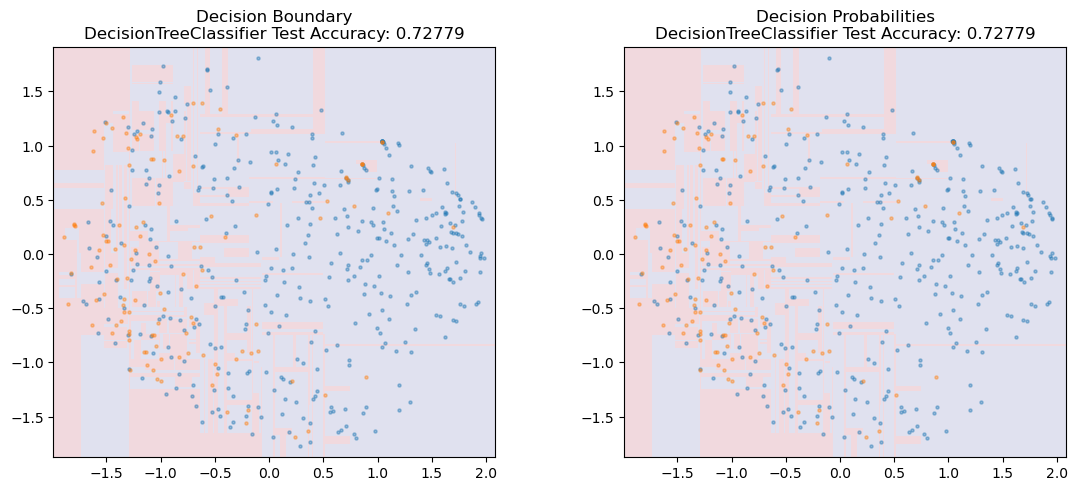

In [245]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

plot_churn_or_not(X_test, y_test, model)

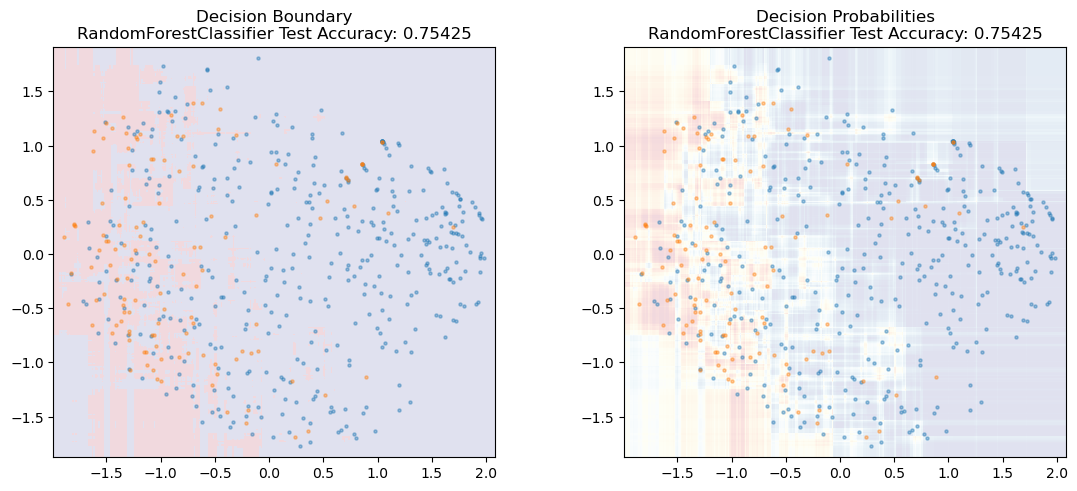

In [246]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

plot_churn_or_not(X_test, y_test, model)

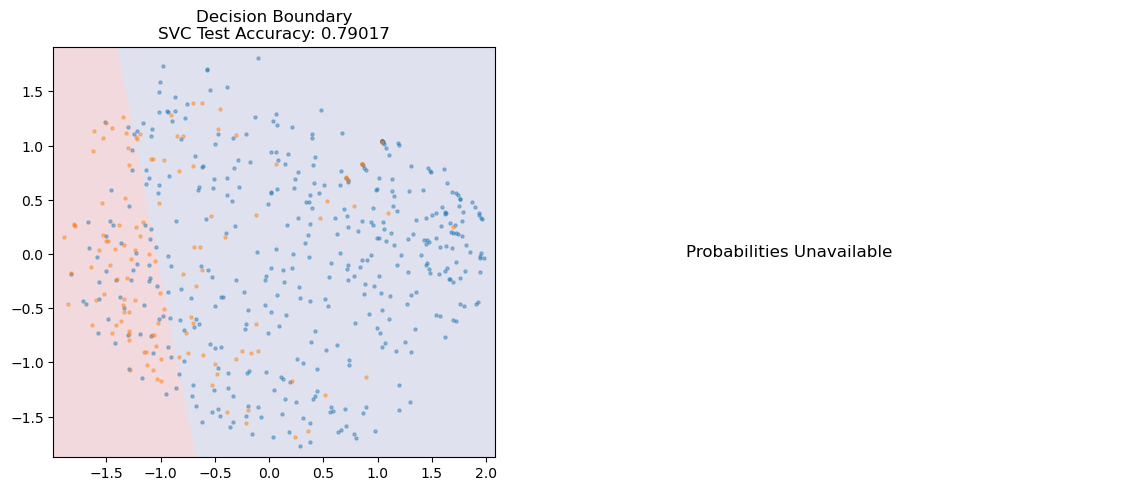

In [247]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train,y_train)

plot_churn_or_not(X_test, y_test, model)

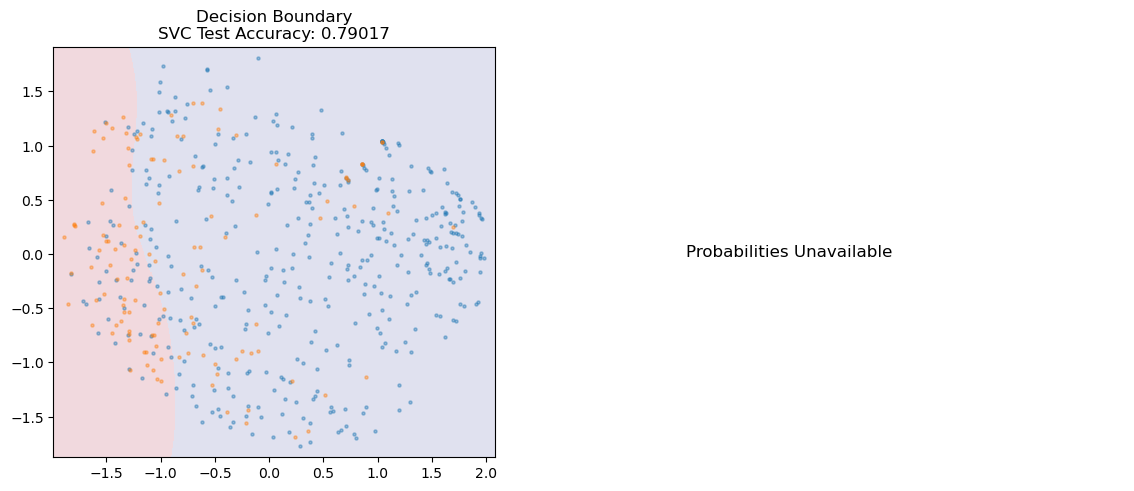

In [248]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=1)
model.fit(X_train,y_train)

plot_churn_or_not(X_test, y_test, model)

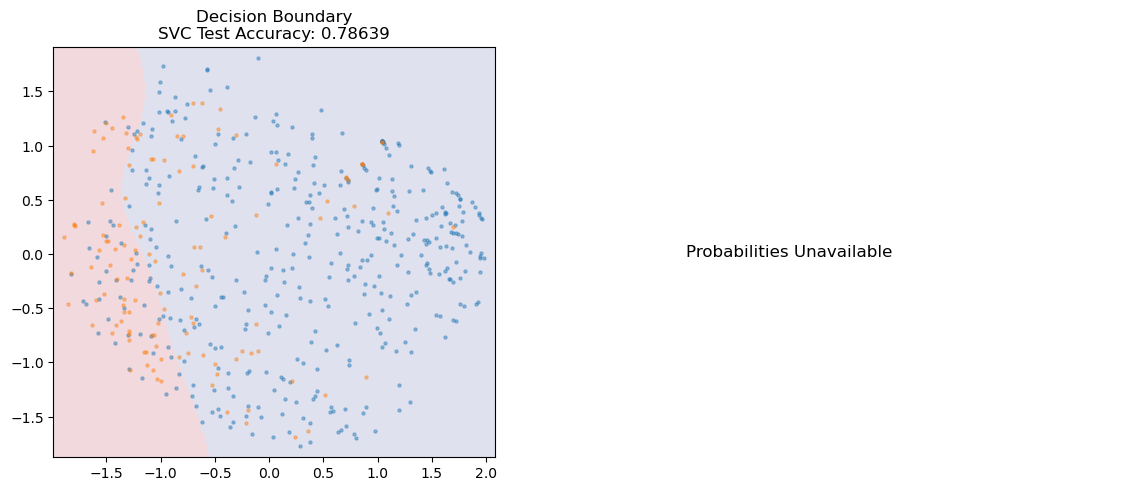

In [249]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=10)
model.fit(X_train,y_train)

plot_churn_or_not(X_test, y_test, model)

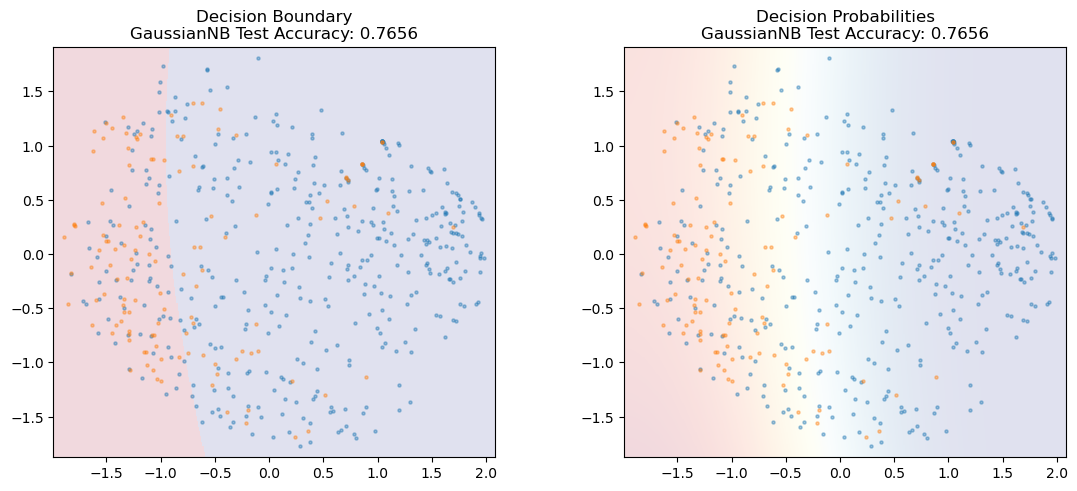

In [250]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

plot_churn_or_not(X_test, y_test, model)

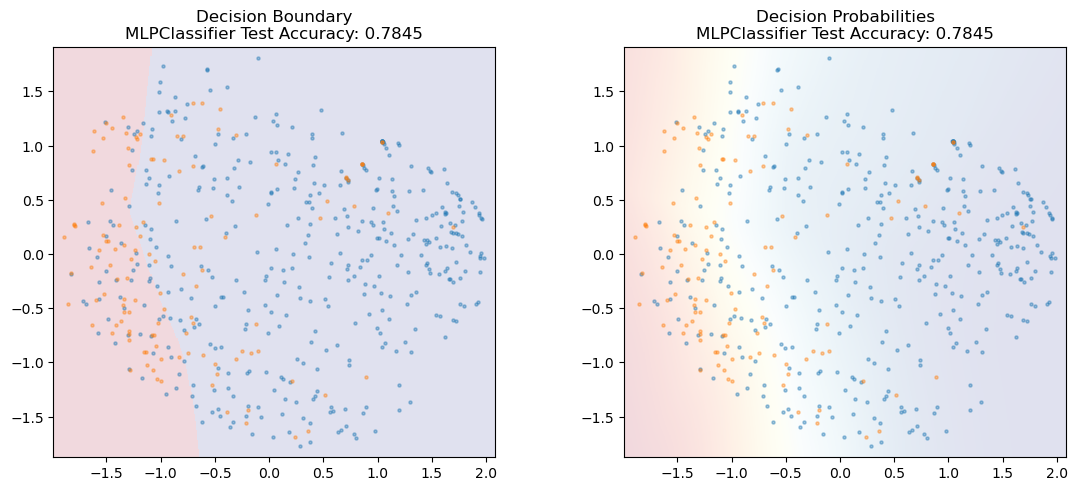

In [251]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(X_train,y_train)

plot_churn_or_not(X_test, y_test, model)

### PART 5: Customer Segmentation

In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [17]:
customerdata = data2.drop(['Churn','OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service',
               'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service','PaperlessBilling_No',
                'MultipleLines_No phone service','MultipleLines_No','PaperlessBilling_No','StreamingMovies_Yes',
               'StreamingTV_Yes','TechSupport_Yes','DeviceProtection_Yes','OnlineBackup_Yes','OnlineSecurity_Yes'], axis=1)

customerdata

tenure  MonthlyCharges  TotalCharges  gender_Female  SeniorCitizen_1  \
0     0.013889        0.115423      0.003437              1                0   
1     0.472222        0.385075      0.217564              0                0   
2     0.027778        0.354229      0.012453              0                0   
3     0.625000        0.239303      0.211951              0                0   
4     0.027778        0.521891      0.017462              1                0   
...        ...             ...           ...            ...              ...   
7038  0.333333        0.662189      0.229194              0                0   
7039  1.000000        0.845274      0.847792              1                0   
7040  0.152778        0.112935      0.039892              1                0   
7041  0.055556        0.558706      0.035303              0                1   
7042  0.916667        0.869652      0.788101              0                0   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  MultipleLines_Yes  \
0               1               0                 0                  0   
1               0               0                 1                  0   
2               0               0                 1                  0   
3               0               0                 0                  0   
4               0               0                 1                  0   
...           ...             ...               ...                ...   
7038            1               1                 1                  1   
7039            1               1                 1                  1   
7040            1               1                 0                  0   
7041            1               0                 1                  1   
7042            0               0                 1                  0   

      InternetService_DSL  ...  StreamingTV_No  StreamingMovies_No  \
0                       1  ...               1                   1   
1                       1  ...               1                   1   
2                       1  ...               1                   1   
3                       1  ...               1                   1   
4                       0  ...               1                   1   
...                   ...  ...             ...                 ...   
7038                    1  ...               0                   0   
7039                    0  ...               0                   0   
7040                    1  ...               1                   1   
7041                    0  ...               1                   1   
7042                    0  ...               0                   0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                           1                  0                  0   
1                           0                  1                  0   
2                           1                  0                  0   
3                           0                  1                  0   
4                           1                  0                  0   
...                       ...                ...                ...   
7038                        0                  1                  0   
7039                        0                  1                  0   
7040                        1                  0                  0   
7041                        1                  0                  0   
7042                        0                  0                  1   

      PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
0                        1                                        0   
1                        0                                        0   
2                        1                                        0   
3                        0                                        1   
4                        1                                        0   
...                    ...            

In [18]:
kmeans_model = KMeans(init='k-means++',  max_iter=400, random_state=42)

In [19]:
kmeans_model.fit(customerdata)

KMeans(max_iter=400, random_state=42)

In [20]:
def try_different_clusters(K, data):

    cluster_values = list(range(1, K+1))
    inertias=[]

    for c in cluster_values:
        model = KMeans(n_clusters = c,init='k-means++',max_iter=400,random_state=42)
        model.fit(data)
        inertias.append(model.inertia_)

    return inertias

In [21]:
outputs = try_different_clusters(12, customerdata)
distances = pd.DataFrame({"clusters": list(range(1, 13)),"sum of squared distances": outputs})

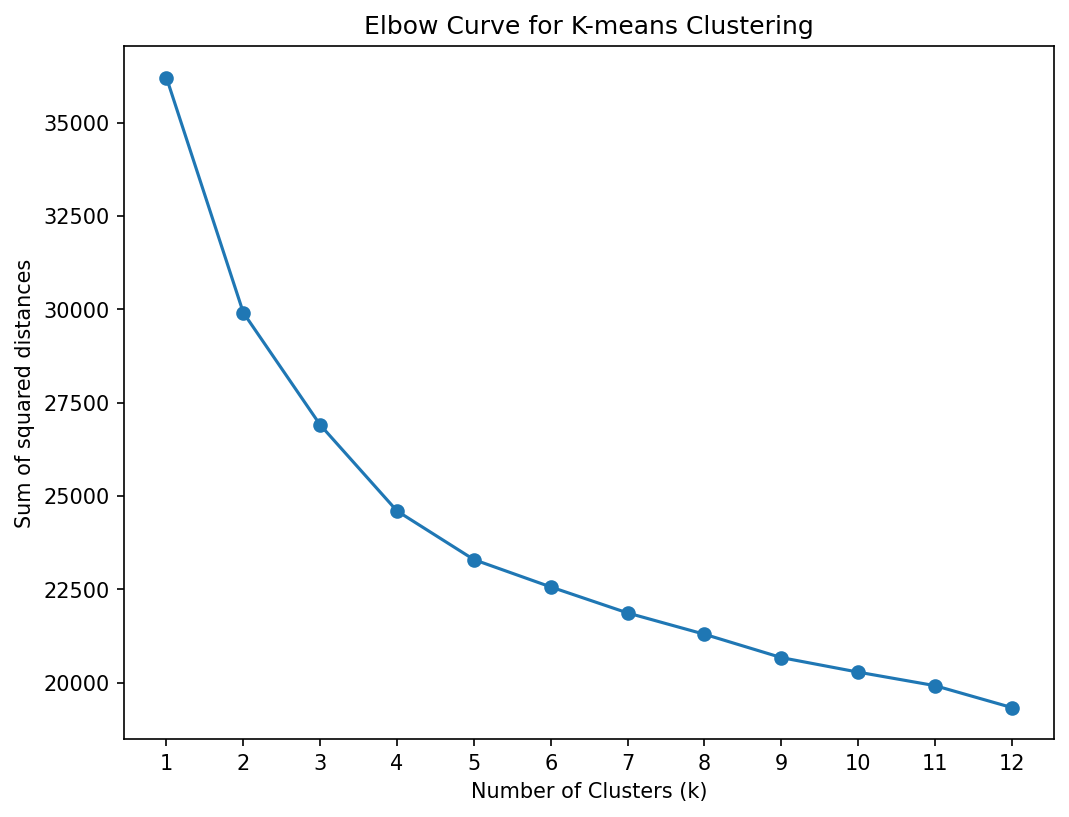

In [25]:
plt.figure(figsize=(8, 6),dpi=150)
plt.plot(distances["clusters"], distances["sum of squared distances"], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Curve for K-means Clustering')
plt.xticks(distances["clusters"][::1])
plt.show()

In [58]:
kmeans_model_new = KMeans(n_clusters = 5,init='k-means++',max_iter=400,random_state=42)

kmeans_model_new.fit_predict(customerdata)

array([0, 0, 0, ..., 0, 4, 3])

In [59]:
customerdata["clusters"] = kmeans_model_new.labels_

In [60]:
customerdata

tenure  MonthlyCharges  TotalCharges  gender_Female  SeniorCitizen_1  \
0     0.013889        0.115423      0.003437              1                0   
1     0.472222        0.385075      0.217564              0                0   
2     0.027778        0.354229      0.012453              0                0   
3     0.625000        0.239303      0.211951              0                0   
4     0.027778        0.521891      0.017462              1                0   
...        ...             ...           ...            ...              ...   
7038  0.333333        0.662189      0.229194              0                0   
7039  1.000000        0.845274      0.847792              1                0   
7040  0.152778        0.112935      0.039892              1                0   
7041  0.055556        0.558706      0.035303              0                1   
7042  0.916667        0.869652      0.788101              0                0   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  MultipleLines_Yes  \
0               1               0                 0                  0   
1               0               0                 1                  0   
2               0               0                 1                  0   
3               0               0                 0                  0   
4               0               0                 1                  0   
...           ...             ...               ...                ...   
7038            1               1                 1                  1   
7039            1               1                 1                  1   
7040            1               1                 0                  0   
7041            1               0                 1                  1   
7042            0               0                 1                  0   

      InternetService_DSL  ...  StreamingMovies_No  Contract_Month-to-month  \
0                       1  ...                   1                        1   
1                       1  ...                   1                        0   
2                       1  ...                   1                        1   
3                       1  ...                   1                        0   
4                       0  ...                   1                        1   
...                   ...  ...                 ...                      ...   
7038                    1  ...                   0                        0   
7039                    0  ...                   0                        0   
7040                    1  ...                   1                        1   
7041                    0  ...                   1                        1   
7042                    0  ...                   0                        0   

      Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0                     0                  0                     1   
1                     1                  0                     0   
2                     0                  0                     1   
3                     1                  0                     0   
4                     0                  0                     1   
...                 ...                ...                   ...   
7038                  1                  0                     1   
7039                  1                  0                     1   
7040                  0                  0                     1   
7041                  0                  0                     1   
7042                  0                  1                     1   

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           0   
...                                       ...   
7038                                        0   


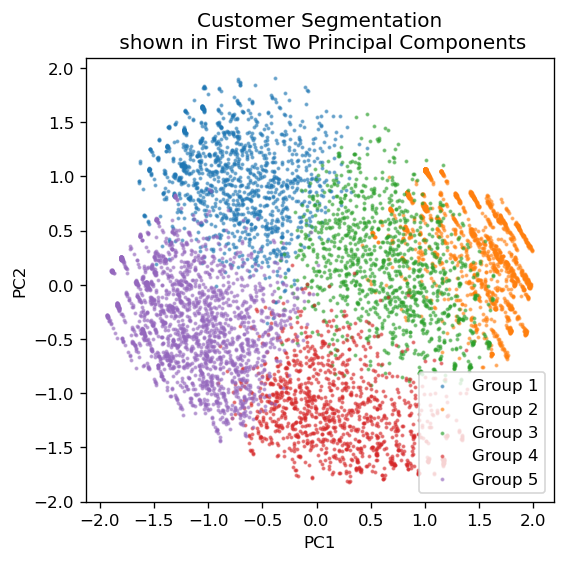

In [61]:
%matplotlib inline

from sklearn.decomposition import PCA

df2 = data2.sample(frac=0.3)

X = customerdata.drop(['clusters'], axis=1)
y = customerdata.iloc[:,-1]

pca = PCA(n_components=2).fit_transform(X)

plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='Group 1', s=2)
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='Group 2', s=2)
plt.scatter(pca[y.values==2,0], pca[y.values==2,1], alpha=0.5, label='Group 3', s=2)
plt.scatter(pca[y.values==3,0], pca[y.values==3,1], alpha=0.5, label='Group 4', s=2)
plt.scatter(pca[y.values==4,0], pca[y.values==4,1], alpha=0.5, label='Group 5', s=2)

plt.legend()
plt.title('Customer Segmentation\n shown in First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')

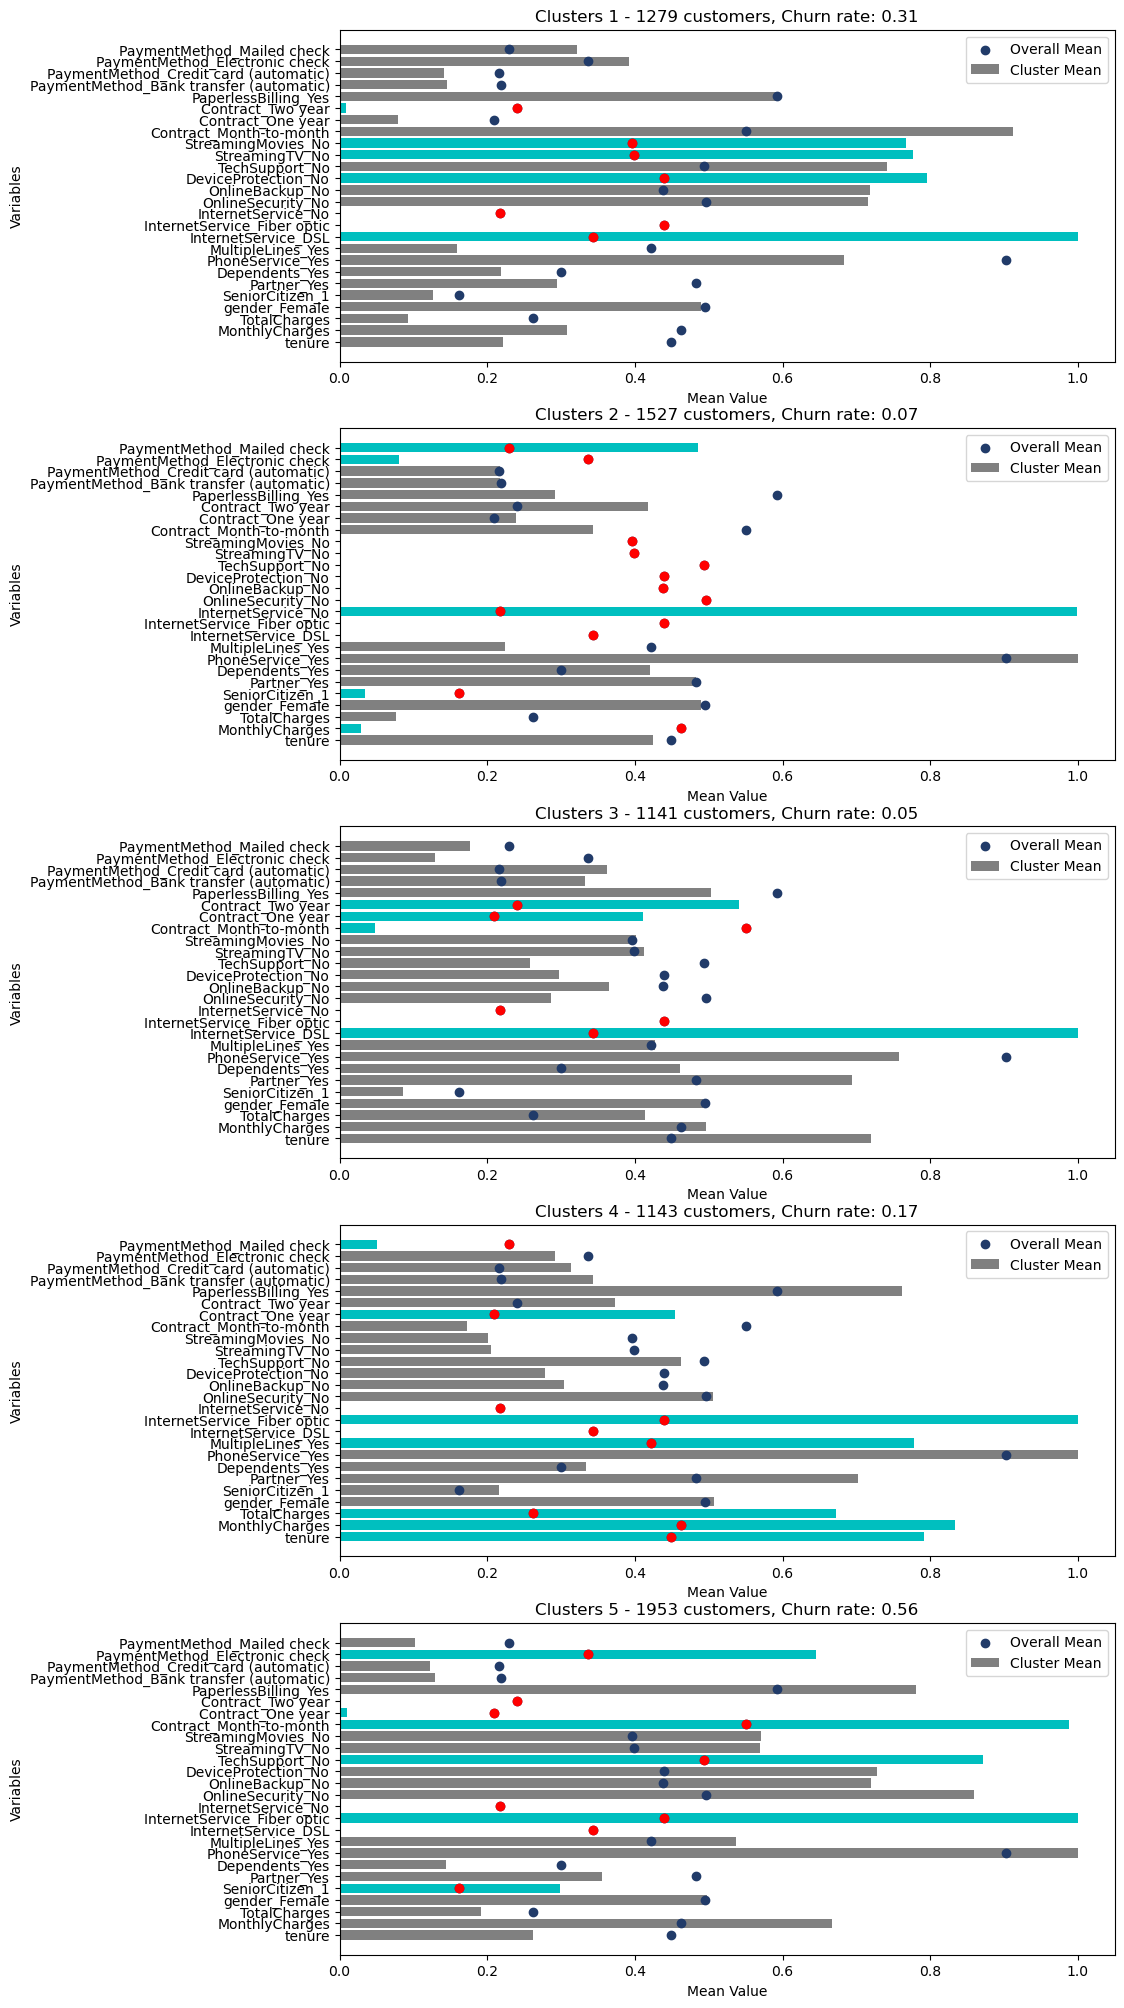

In [130]:
variable_columns = customerdata.columns[customerdata.columns != 'clusters']

fig, axs = plt.subplots(nrows=5, figsize=(10, 25))

for cluster_value in range(0,5):
    cluster_mean = customerdata[customerdata['clusters'] == cluster_value][variable_columns].mean()
    
    axs[cluster_value].barh(cluster_mean.index, cluster_mean.values, color = 'grey',label='Cluster Mean')
    
    overall_mean = customerdata[variable_columns].mean()
    
    highlight = []
    
    for i in range(0,len(cluster_mean)):
        if abs(cluster_mean[i] - overall_mean[i])/overall_mean[i] >0.75:
            highlight.append(cluster_mean.index[i]) 
            
    axs[cluster_value].barh(highlight, cluster_mean[highlight].values, color = 'c')
    
    axs[cluster_value].scatter(overall_mean.values, overall_mean.index, color='#213B69', label='Overall Mean', marker='o')
    axs[cluster_value].scatter(overall_mean[highlight].values, highlight, color='red', marker='o')
    
    axs[cluster_value].set_xlabel('Mean Value')
    axs[cluster_value].set_ylabel('Variables')
    axs[cluster_value].set_title(f"Clusters {cluster_value+1} - {len(customerdata[customerdata['clusters'] == cluster_value])} customers, Churn rate: {data2.iloc[list(customerdata[customerdata['clusters'] == cluster_value].index)]['Churn'].sum()/len(customerdata[customerdata['clusters'] == cluster_value]):.2f}")
    axs[cluster_value].legend()    

plt.show()

### PART 6: Summary

Based on the results of the exploratory data analysis and additionally validated principal component analysis, here are some suggestions for business optimisation:

**1. Promote contract types with longer-term:**

Compared to other contracts with longer terms, customers who sign month-to-month contracts have a much higher churn rate. The company could incentivise customers to sign one-year or two-year contracts, such as offering discounts and promotions on service packages.

**2. Concentrate on customers with fibre optic internet service:**

As fibre optic internet service is highly correlated with monthly charges, the company could look into in-depth reasons for this, such as whether the service is too expensive to customers or the experience is dissatisfied to customers.

**3. Pay more attention to new customers:**

Customers staying shorter are more likely to churn, especially those who only stay for a few months. The company could take methods to ensure new customers have better experiences with the services, such as providing free trial and fast-track customer service.

**4. Strengthen the promotion of various value-added services:**

Lack of practical service functions can easily lead to customer churn, including tech support, online security, device protection, and online backup. The company could promote these services more effectively.

**5. Identify segmented customers and apply different strategies:**

Senior citizens and customers without partners or dependents are more likely to churn. The company could adjust marketing strategies and provide special offers for these customers.

**Additionally:**

PowerBI has powerful visualisation capabilities, and its interactive function can observe changes in other feature indices by filtering one feature, in order to obtain more insightful and indirect data relationships, which is difficult for Python to achieve. 

For example, through the interaction on the dashboard, it can be found that the high churn rate caused by electronic check method and no tech support is actually highly correlated with month-to-month contract.

Here is a PowerBI report that reflects key information:
https://app.powerbi.com/view?r=eyJrIjoiY2M0MTBjOWItOTFhZC00OGM1LWFlZDMtYTIxMWQ1YjM2ZDkwIiwidCI6ImNkNWRmNDkxLTZhMTYtNDkzZS1iNTVhLTkzOGYzYWE5YWRlYiIsImMiOjEwfQ%3D%3D